# E-Commerce: Identify Customer Profiles

This project will analyze dataset contains the transaction history of Everything Plus, an online store that sells household goods.

Link to presentation: <https://drive.google.com/file/d/1eFPBcQCrJHuNSC0o4kiQbhEt15VmHQ7b/view?usp=share_link>

## Table of Contents

* [Introduction](#Introduction)
* [Load Dataset](#Load-Dataset)
* [Data Preprocessing](#Data-Pre-Processing)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Machine Learning](#Machine-Learning)
* [Statistical Testing](#Statistical-Testing)
* [Conclusion](#Conclusion)

## Introduction

Identifying customer profiles based on customers' activity and purchase behavior will be the main focus in this project. 

### Objectives

To segment users based on their consumer profiles. Customer segmentation is very important for e-commerce. Grouping customers based on their shared attributes (e.g.,
demographics, interests, and spending habits) can help e-commerce companies send relevant, timely promotions to their users. When the promoted item targets the right customers or fits their buying habits, this will help the business improve its chances of success in retaining customers and increase sales.

### Analysis Procedures

1. Loading dataset
2. Data Pre-processing
3. Exploratory data analysis
4. Machine Learning
5. Analysis
6. Statistical Testing
7. Preparing a presentation
8. Preparing a dashboard
9. Conclusion

## Load Dataset

Loading required libraries and dataset.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from sklearn.cluster import KMeans
from scipy import stats as st
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Load the dataset
try:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
except:
    df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

## Data Pre-Processing

### Data Preview

Perform a quick check on the dataset and identify any abnormalities from the surface.

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0

From viewing the dataset:
* Column names are fine but for convenience they can be changed to lowercase and snakecase.
* CustomerID has decimal points, so it is still a float data type and needs to be changed to object.

In [4]:
# Displaying dataset's number of rows and columns
df.shape

(541909, 7)

The initial dataset contains 541909 rows of data and 7 columns. Each column has the following meaning:
* `InvoiceNo` — order identifier 
* `StockCode` — item identifier 
* `Description` — item name 
* `Quantity` — number of item ordered
* `InvoiceDate` — order date 
* `UnitPrice` — price per item 
* `CustomerID` — customer identifier

In [5]:
# Displaying dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


There are missing values in `Description` and `CustomerID` column. InvoiceDate datatype should be in datetime.

In [6]:
# Checking the number of rows with missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

There are 1454 missing values in `description` and 135080 in `customer_id`.

In [7]:
# Checking for duplicates in the dataset
df.duplicated().sum()

5268

There were 5268 duplicates in the dataset.

In [8]:
# Displaying descriptive statistics of the dataset
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

There are abnormal values in `Quantity` and `UnitPrice` column. Both of these columns normally should not contain negative values. There were also extremely high values in `Quantity` and `UnitPrice`.

From initial inspection of the dataset, there are several findings:
* Column names preferrably in lowercase and snake case.
* Missing values in `Description` and `CustomerID` column. 
* Wrong data types: InvoiceDate should be a datetime instead of object.
* 5268 duplicates found.
* Negative values and unusually high values in `Quantity` and `UnitPrice` column.

### Data Cleansing

For convenience, the column names will be changed into lowercase and snakecase.

In [9]:
# Changing column names into lowercase snakecase format
df.columns = df.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower()

df.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       invoice_date  unit_price  customer_id  
0  11/29/2018 08:26        2.55      17850.0  
1  11/29/2018 08:26        3.39      17850.0  
2  11/29/2018 08:26        2.75      17850.0  
3  11/29/2018 08:26        3.39      17850.0  
4  11/29/2018 08:26        3.39      17850.0

#### Remove Duplicates

Remove obvious duplicates from the dataset.

In [10]:
# Remove duplicates and keep only the first occurrence
df2 = df.drop_duplicates()

In [11]:
# Checking the number of duplicates in the dataset
df2.duplicated().sum()

0

All duplicate rows have been removed from the dataset. Let's check the remaining number of rows in the dataset.

In [12]:
# Checking the number of rows in the dataset after duplicates were removed
df2.shape

(536641, 7)

#### Remove rows with negative unit price

Normally, price cannot be negative. Let's check rows containing negative unit price.

In [13]:
# Displaying rows with negative unit price
df2.loc[df2['unit_price']<0]

invoice_no stock_code      description  quantity      invoice_date  \
299983    A563186          B  Adjust bad debt         1  08/10/2019 14:51   
299984    A563187          B  Adjust bad debt         1  08/10/2019 14:52   

        unit_price  customer_id  
299983   -11062.06          NaN  
299984   -11062.06          NaN

There are rows with "Adjust bad debt" in the `description`. The invoice number also begins with letter. Let's check the occurence of the word 'adjust' in the whole dataset.

In [14]:
# Displaying rows containing the word 'adjust' in the `description`
df2.loc[df2['description'].str.lower().str.contains("adjust")==True]

invoice_no stock_code                  description  quantity  \
42564      540010      22501   reverse 21/5/10 adjustment      -100   
42566      540012      22502   reverse 21/5/10 adjustment      -100   
112219     545875      21736                   Adjustment        34   
166639     550947      21319                   adjustment         3   
166640     550948     17109D                   Adjustment        14   
169714     551240     51020A                   adjustment        41   
169715     551243     51020B                       adjust       -53   
170485     551304      48189                   adjustment         2   
195520     553719     85017C                   adjustment         1   
203752     554551     47566B  reverse previous adjustment     -1300   
299982    A563185          B              Adjust bad debt         1   
299983    A563186          B              Adjust bad debt         1   
299984    A563187          B              Adjust bad debt         1   
302846     563453      21033         taig adjust no stock       -24   
332824     566122      23084              temp adjustment      -484   
336411     566324      22035                  taig adjust         1   
336412     566325      22035                  taig adjust        36   
345011     567132      21830            OOPS ! adjustment      -384   
368142     568946      22740                   adjustment        89   
414724     572477      20665                   adjustment       -15   
414960     572510      20967            Amazon Adjustment         1   
417107     572614      23595                   adjustment         5   
417108     572615      23595                re-adjustment        -5   
418453     572723      21829                   adjustment        12   
418454     572724     84507C                   adjustment         4   
418659     572740      22687                   adjustment         1   
422693     573107      21794                   adjustment        10   
424958     573293      21181                   adjustment        10   
464521     576109      21181                   adjustment       180   
471327     576632      21823                amazon adjust        10   
472221     576673      22548                   adjustment         4   
472223     576675      37327                   adjustment         3   
474060     576839     35818B                   adjustment       -22   
485593     577611      23118                dotcom adjust        10   

            invoice_date  unit_price  customer_id  
42564   01/02/2019 11:13        0.00          NaN  
42566   01/02/2019 11:14        0.00          NaN  
112219  03/05/2019 15:18        0.00          NaN  
166639  04/19/2019 15:55        0.00          NaN  
166640  04/19/2019 15:56        0.00          NaN  
169714  04/25/2019 11:48        0.00          NaN  
169715  04/25/2019 11:49        0.00          NaN  
170485  04/25/2019 14:56        0.00          NaN  
195520  05/16/2019 16:18        0.00          NaN  
203752  05/23/2019 09:58        0.00          NaN  
299982  08/10/2019 14:50    11062.06          NaN  
299983  08/10/2019 14:51   -11062.06          NaN  
299984  08/10/2019 14:52   -11062.06          NaN  
302846  08/14/2019 14:34        0.00          NaN  
332824  09/07/2019 10:57        0.00          NaN  
336411  09/10/2019 12:03        0.00          NaN  
336412  09/10/2019 12:03        0.00          NaN  
345011  09/14/2019 14:14        0.00          NaN  
368142  09/27/2019 15:01        0.00          NaN  
414724  10/22/2019 13:39        0.00          NaN  
414960  10/22/2019 14:27        0.00          NaN  
417107  10/23/2019 11:38        0.00          NaN  
417108  10/23/2019 11:39        0.00          NaN  
418453  10/23/2019 15:13        0.00          NaN  
418454  10/23/2019 15:14        0.00          NaN  
418659  10/23/2019 15:45        0.00          NaN  
422693  10/25/2019 15:06        0.00          NaN  
424958  10/26/2019 15:14        0.00          NaN  
464521  11/12

These rows will be dropped since they are not related to sales.

In [15]:
# Remove rows containing the phrase 'adjust' in the description
df2 = df2.loc[df['description'].str.lower().str.contains("adjust")==False]

Displaying the number of rows remained.

In [16]:
# Number of rows and columns in the dataset
df2.shape

(535153, 7)

#### Remove rows with zero unit price

Check rows containing zero unit price.

In [17]:
# Checking rows with zero unit price
df2.loc[df2['unit_price']==0]

invoice_no stock_code                   description  quantity  \
6391       536941      22734                        amazon        20   
6392       536942      22139                        amazon        15   
7313       537032      21275                             ?       -30   
9302       537197      22841  ROUND CAKE TIN VINTAGE GREEN         1   
13217      537425     84968F                         check       -20   
...           ...        ...                           ...       ...   
535336     581213      22576                         check       -30   
536908     581226      23090                       missing      -338   
538504     581406     46000M  POLYESTER FILLER PAD 45x45cm       240   
538505     581406     46000S  POLYESTER FILLER PAD 40x40cm       300   
538919     581422      23169                       smashed      -235   

            invoice_date  unit_price  customer_id  
6391    12/01/2018 12:08         0.0          NaN  
6392    12/01/2018 12:08         0.0          NaN  
7313    12/01/2018 16:50         0.0          NaN  
9302    12/03/2018 14:02         0.0      12647.0  
13217   12/04/2018 15:35         0.0          NaN  
...                  ...         ...          ...  
535336  12/05/2019 18:38         0.0          NaN  
536908  12/06/2019 09:56         0.0          NaN  
538504  12/06/2019 13:58         0.0          NaN  
538505  12/06/2019 13:58         0.0          NaN  
538919  12/06/2019 15:24         0.0          NaN  

[1025 rows x 7 columns]

There were 1025 records with zero values in `unit_price`. The product description and customer_id are missing in some rows. These rows will be dropped since the store also can not be selling free items. Besides, we cannot asign values for zero unit price since the price value is not always constant from time to time.

In [18]:
# Remove rows with zero unit price
df2 = df2.loc[df2['unit_price']>0]
df2

invoice_no stock_code                          description  quantity  \
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587      22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587      23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587      22138        BAKING SET 9 PIECE RETROSPOT          3   

            invoice_date  unit_price  customer_id  
0       11/29/2018 08:26        2.55      17850.0  
1       11/29/2018 08:26        3.39      17850.0  
2       11/29/2018 08:26        2.75      17850.0  
3       11/29/2018 08:26        3.39      17850.0  
4       11/29/2018 08:26        3.39      17850.0  
...                  ...         ...          ...  
541904  12/07/2019 12:50        0.85      12680.0  
541905  12/07/2019 12:50        2.10      12680.0  
541906  12/07/2019 12:50        4.15      12680.0  
541907  12/07/2019 12:50        4.15      12680.0  
541908  12/07/2019 12:50        4.95      12680.0  

[534128 rows x 7 columns]

In [19]:
# Checking for number of missing values in each column
df2.isna().sum()

invoice_no           0
stock_code           0
description          0
quantity             0
invoice_date         0
unit_price           0
customer_id     132564
dtype: int64

Now all columns except customer_id have no missing values.

#### Rows with negative quantity

In [20]:
# Checking rows with negative quantity 
df2.loc[df2['quantity']<0]

invoice_no stock_code                       description  quantity  \
141       C536379          D                          Discount        -1   
154       C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235       C536391      22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236       C536391      21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237       C536391      21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...           ...        ...                               ...       ...   
540449    C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541    C581499          M                            Manual        -1   
541715    C581568      21258        VICTORIAN SEWING BOX LARGE        -5   
541716    C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717    C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   

            invoice_date  unit_price  customer_id  
141     11/29/2018 09:41       27.50      14527.0  
154     11/29/2018 09:49        4.65      15311.0  
235     11/29/2018 10:24        1.65      17548.0  
236     11/29/2018 10:24        0.29      17548.0  
237     11/29/2018 10:24        0.29      17548.0  
...                  ...         ...          ...  
540449  12/07/2019 09:57        0.83      14397.0  
541541  12/07/2019 10:28      224.69      15498.0  
541715  12/07/2019 11:57       10.95      15311.0  
541716  12/07/2019 11:58        1.25      17315.0  
541717  12/07/2019 11:58        1.25      17315.0  

[9251 rows x 7 columns]

Notice the different style in invoice number. When quantity is negative, invoice_no starts with letter 'C', unlike the usual six-digits number format. These negative values might be a cancellation or returned orders. There were also unusual value in the description like 'Discount' and 'Manual'. We'll get back to this later. 

In [21]:
# Checking rows with negative quantity and invoice number starting with letter C.
df2.loc[(df2['quantity']<0) & (df2['invoice_no'].str.startswith('C'))]

invoice_no stock_code                       description  quantity  \
141       C536379          D                          Discount        -1   
154       C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235       C536391      22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236       C536391      21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237       C536391      21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...           ...        ...                               ...       ...   
540449    C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541    C581499          M                            Manual        -1   
541715    C581568      21258        VICTORIAN SEWING BOX LARGE        -5   
541716    C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717    C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   

            invoice_date  unit_price  customer_id  
141     11/29/2018 09:41       27.50      14527.0  
154     11/29/2018 09:49        4.65      15311.0  
235     11/29/2018 10:24        1.65      17548.0  
236     11/29/2018 10:24        0.29      17548.0  
237     11/29/2018 10:24        0.29      17548.0  
...                  ...         ...          ...  
540449  12/07/2019 09:57        0.83      14397.0  
541541  12/07/2019 10:28      224.69      15498.0  
541715  12/07/2019 11:57       10.95      15311.0  
541716  12/07/2019 11:58        1.25      17315.0  
541717  12/07/2019 11:58        1.25      17315.0  

[9251 rows x 7 columns]

All 9251 rows with negative quantity have invoice_no started with the letter C. Next, the index from the current dataset will be retained in a column named 'index' so that each rows have unique identifier. 

In [22]:
# Retain index as column
df2 = df2.reset_index()
df2

index invoice_no stock_code                          description  \
0            0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1     536365      71053                  WHITE METAL LANTERN   
2            2     536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3            3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...        ...        ...                                  ...   
534123  541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS   
534124  541905     581587      22899         CHILDREN'S APRON DOLLY GIRL    
534125  541906     581587      23254        CHILDRENS CUTLERY DOLLY GIRL    
534126  541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
534127  541908     581587      22138        BAKING SET 9 PIECE RETROSPOT    

        quantity      invoice_date  unit_price  customer_id  
0              6  11/29/2018 08:26        2.55      17850.0  
1              6  11/29/2018 08:26        3.39      17850.0  
2              8  11/29/2018 08:26        2.75      17850.0  
3              6  11/29/2018 08:26        3.39      17850.0  
4              6  11/29/2018 08:26        3.39      17850.0  
...          ...               ...         ...          ...  
534123        12  12/07/2019 12:50        0.85      12680.0  
534124         6  12/07/2019 12:50        2.10      12680.0  
534125         4  12/07/2019 12:50        4.15      12680.0  
534126         4  12/07/2019 12:50        4.15      12680.0  
534127         3  12/07/2019 12:50        4.95      12680.0  

[534128 rows x 8 columns]

Let's check if there are any invoice numbers that begin with letter other than C.

In [23]:
# Checking invoice number that begins with letter
df2.loc[df2['invoice_no'].str.contains('^[A-Z]')].sort_values(by='invoice_no')

index invoice_no stock_code                       description  \
141        141    C536379          D                          Discount   
154        154    C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS   
235        235    C536391      22556    PLASTERS IN TIN CIRCUS PARADE    
236        236    C536391      21984  PACK OF 12 PINK PAISLEY TISSUES    
237        237    C536391      21983  PACK OF 12 BLUE PAISLEY TISSUES    
...        ...        ...        ...                               ...   
532675  540449    C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL   
533767  541541    C581499          M                            Manual   
533934  541715    C581568      21258        VICTORIAN SEWING BOX LARGE   
533935  541716    C581569      84978  HANGING HEART JAR T-LIGHT HOLDER   
533936  541717    C581569      20979     36 PENCILS TUBE RED RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  
141           -1  11/29/2018 09:41       27.50      14527.0  
154           -1  11/29/2018 09:49        4.65      15311.0  
235          -12  11/29/2018 10:24        1.65      17548.0  
236          -24  11/29/2018 10:24        0.29      17548.0  
237          -24  11/29/2018 10:24        0.29      17548.0  
...          ...               ...         ...          ...  
532675       -11  12/07/2019 09:57        0.83      14397.0  
533767        -1  12/07/2019 10:28      224.69      15498.0  
533934        -5  12/07/2019 11:57       10.95      15311.0  
533935        -1  12/07/2019 11:58        1.25      17315.0  
533936        -5  12/07/2019 11:58        1.25      17315.0  

[9251 rows x 8 columns]

Invoice numbers that start with letter only starts with 'C'.

#### Remove excess/trailing spaces from description

Checking the number of unique descriptions.

In [24]:
# Getting the number of unique descriptions
df2['description'].nunique()

4041

Remove any leading and trailing spaces from the description.

In [25]:
# Removing excessive space from the description
df2['description'] = df2['description'].str.strip()

Checking the number of unique descriptions after removal.

In [26]:
# Number of unique values in `description`
df2['description'].nunique()

4030

Number of unique values in `description` is reduced from 4041 to 4030 just by removing excessive spaces.

#### Separate rows with bought item and returned item

Rows with bought item have positive quantity.

In [27]:
# Rows with positive quantity (bought item)
buy = df2.loc[df2['quantity']>0]
buy

index invoice_no stock_code                          description  \
0            0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1     536365      71053                  WHITE METAL LANTERN   
2            2     536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3            3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...        ...        ...                                  ...   
534123  541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS   
534124  541905     581587      22899          CHILDREN'S APRON DOLLY GIRL   
534125  541906     581587      23254         CHILDRENS CUTLERY DOLLY GIRL   
534126  541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
534127  541908     581587      22138         BAKING SET 9 PIECE RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  
0              6  11/29/2018 08:26        2.55      17850.0  
1              6  11/29/2018 08:26        3.39      17850.0  
2              8  11/29/2018 08:26        2.75      17850.0  
3              6  11/29/2018 08:26        3.39      17850.0  
4              6  11/29/2018 08:26        3.39      17850.0  
...          ...               ...         ...          ...  
534123        12  12/07/2019 12:50        0.85      12680.0  
534124         6  12/07/2019 12:50        2.10      12680.0  
534125         4  12/07/2019 12:50        4.15      12680.0  
534126         4  12/07/2019 12:50        4.15      12680.0  
534127         3  12/07/2019 12:50        4.95      12680.0  

[524877 rows x 8 columns]

Rows with returned item have negative quantity except for those with 'Discount' as the description. 

In [28]:
# Getting rows with negative quantity or with invoice number starts with C (returned/cancelled item) except Discount
ret = df2.loc[(df2['invoice_no'].str.startswith('C'))&(df['stock_code']!='D')]
ret

index invoice_no stock_code                       description  \
154        154    C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS   
235        235    C536391      22556     PLASTERS IN TIN CIRCUS PARADE   
236        236    C536391      21984   PACK OF 12 PINK PAISLEY TISSUES   
237        237    C536391      21983   PACK OF 12 BLUE PAISLEY TISSUES   
238        238    C536391      21980  PACK OF 12 RED RETROSPOT TISSUES   
...        ...        ...        ...                               ...   
532675  540449    C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL   
533767  541541    C581499          M                            Manual   
533934  541715    C581568      21258        VICTORIAN SEWING BOX LARGE   
533935  541716    C581569      84978  HANGING HEART JAR T-LIGHT HOLDER   
533936  541717    C581569      20979     36 PENCILS TUBE RED RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  
154           -1  11/29/2018 09:49        4.65      15311.0  
235          -12  11/29/2018 10:24        1.65      17548.0  
236          -24  11/29/2018 10:24        0.29      17548.0  
237          -24  11/29/2018 10:24        0.29      17548.0  
238          -24  11/29/2018 10:24        0.29      17548.0  
...          ...               ...         ...          ...  
532675       -11  12/07/2019 09:57        0.83      14397.0  
533767        -1  12/07/2019 10:28      224.69      15498.0  
533934        -5  12/07/2019 11:57       10.95      15311.0  
533935        -1  12/07/2019 11:58        1.25      17315.0  
533936        -5  12/07/2019 11:58        1.25      17315.0  

[9248 rows x 8 columns]

#### Create a table for pairs of purchase and returned item

Merging `buy` and `ret` dataset will produce a table containing the purchase data and the counterpart (return data).

In [29]:
# merge rows with positive quantity and rows with negative quantity based on shared identity
check_return = buy.merge(ret, how='inner', 
                         left_on=['customer_id','unit_price','description','stock_code'], 
                         right_on=['customer_id','unit_price','description','stock_code'],
                         suffixes=('','_ret')
                        )
check_return

index invoice_no stock_code                        description  \
0           6     536365      21730  GLASS STAR FROSTED T-LIGHT HOLDER   
1          64     536373      21730  GLASS STAR FROSTED T-LIGHT HOLDER   
2          81     536375      21730  GLASS STAR FROSTED T-LIGHT HOLDER   
3         295     536396      21730  GLASS STAR FROSTED T-LIGHT HOLDER   
4         432     536406      21730  GLASS STAR FROSTED T-LIGHT HOLDER   
...       ...        ...        ...                                ...   
20949  540161     581469     51014C             FEATHER PEN,COAL BLACK   
20950  540161     581469     51014C             FEATHER PEN,COAL BLACK   
20951  540170     581469     84029E     RED WOOLLY HOTTIE WHITE HEART.   
20952  540171     581469      21485   RETROSPOT HEART HOT WATER BOTTLE   
20953  540421     581483      23843        PAPER CRAFT , LITTLE BIRDIE   

       quantity      invoice_date  unit_price  customer_id  index_ret  \
0             6  11/29/2018 08:26        4.25      17850.0      86893   
1             6  11/29/2018 09:02        4.25      17850.0      86893   
2             6  11/29/2018 09:32        4.25      17850.0      86893   
3             6  11/29/2018 10:51        4.25      17850.0      86893   
4             6  11/29/2018 11:33        4.25      17850.0      86893   
...         ...               ...         ...          ...        ...   
20949        12  12/06/2019 19:28        0.39      14606.0     387536   
20950        12  12/06/2019 19:28        0.39      14606.0     434069   
20951         1  12/06/2019 19:28        4.25      14606.0     329640   
20952         1  12/06/2019 19:28        4.95      14606.0     329641   
20953     80995  12/07/2019 09:15        2.08      16446.0     540422   

      invoice_no_ret  quantity_ret  invoice_date_ret  
0            C543611            -1  02/08/2019 14:38  
1            C543611            -1  02/08/2019 14:38  
2            C543611            -1  02/08/2019 14:38  
3            C543611            -1  02/08/2019 14:38  
4            C543611            -1  02/08/2019 14:38  
...              ...           ...               ...  
20949        C570331            -1  10/08/2019 12:18  
20950        C574026            -1  10/31/2019 12:26  
20951        C565848            -1  09/05/2019 12:48  
20952        C565848            -1  09/05/2019 12:48  
20953        C581484        -80995  12/07/2019 09:27  

[20954 rows x 12 columns]

To minimize mistake, only rows with return date (`invoice_date_ret`) that comes after the purchase date (`invoice_date`) will be kept.

In [30]:
# Keeping only rows with return date after invoice date
check_return = check_return.loc[check_return['invoice_date_ret']>check_return['invoice_date']].sort_values(by='invoice_date')
check_return

index invoice_no stock_code                       description  quantity  \
5940  42515     540002      22625                RED KITCHEN SCALES         8   
5945  42516     540002      21259        VICTORIAN SEWING BOX SMALL        24   
3873  42514     540002      21911                 GARDEN METAL SIGN        12   
5939  42515     540002      22625                RED KITCHEN SCALES         8   
5954  42537     540003      22720  SET OF 3 CAKE TINS PANTRY DESIGN         3   
...     ...        ...        ...                               ...       ...   
4638  38268     539496      21868              POTTING SHED TEA MUG        12   
5649  38628     539592      22720  SET OF 3 CAKE TINS PANTRY DESIGN         3   
5658  38634     539593      22940         FELTCRAFT CHRISTMAS FAIRY         4   
5243  40252     539733      22720  SET OF 3 CAKE TINS PANTRY DESIGN         1   
5818  41319     539826      22745         POPPY'S PLAYHOUSE BEDROOM         2   

          invoice_date  unit_price  customer_id  index_ret invoice_no_ret  \
5940  01/02/2019 10:23        8.50      16656.0     338004        C566490   
5945  01/02/2019 10:23        4.95      16656.0      47124        C540377   
3873  01/02/2019 10:23        1.65      16656.0      47123        C540377   
5939  01/02/2019 10:23        8.50      16656.0      72751        C542259   
5954  01/02/2019 10:37        4.95      16875.0      52405        C540781   
...                ...         ...          ...        ...            ...   
4638  12/18/2018 10:38        1.25      13050.0      38950        C539605   
5649  12/18/2018 13:27        4.95      13319.0      39903        C539711   
5658  12/18/2018 13:31        4.25      13319.0      39904        C539711   
5243  12/19/2018 15:13        4.95          NaN      41187        C539756   
5818  12/20/2018 12:39        2.10      15044.0      41326        C539827   

      quantity_ret  invoice_date_ret  
5940            -1  09/11/2019 10:20  
5945            -3  01/04/2019 17:31  
3873           -12  01/04/2019 17:31  
5939            -1  01/24/2019 17:09  
5954            -1  01/09/2019 11:22  
...            ...               ...  
4638            -4  12/18/2018 14:07  
5649            -1  12/19/2018 12:38  
5658            -4  12/19/2018 12:38  
5243            -1  12/19/2018 16:31  
5818            -1  12/20/2018 12:43  

[13546 rows x 12 columns]

However, we still have duplicates on the return side. We'll remove those.

In [31]:
# Remove rows with duplicated index_ret
check_return = check_return.drop_duplicates(subset='index_ret')
check_return

index invoice_no stock_code                          description  \
5940  42515     540002      22625                   RED KITCHEN SCALES   
5945  42516     540002      21259           VICTORIAN SEWING BOX SMALL   
3873  42514     540002      21911                    GARDEN METAL SIGN   
5939  42515     540002      22625                   RED KITCHEN SCALES   
5954  42537     540003      22720     SET OF 3 CAKE TINS PANTRY DESIGN   
...     ...        ...        ...                                  ...   
5433  34448     539374      82483   WOOD 2 DRAWER CABINET WHITE FINISH   
5439  34473     539395      22923  FRIDGE MAGNETS LES ENFANTS ASSORTED   
5476  34661     539417      22791         T-LIGHT GLASS FLUTED ANTIQUE   
5575  37381     539462      22198                 LARGE POPCORN HOLDER   
5818  41319     539826      22745            POPPY'S PLAYHOUSE BEDROOM   

      quantity      invoice_date  unit_price  customer_id  index_ret  \
5940         8  01/02/2019 10:23        8.50      16656.0     338004   
5945        24  01/02/2019 10:23        4.95      16656.0      47124   
3873        12  01/02/2019 10:23        1.65      16656.0      47123   
5939         8  01/02/2019 10:23        8.50      16656.0      72751   
5954         3  01/02/2019 10:37        4.95      16875.0      52405   
...        ...               ...         ...          ...        ...   
5433         4  12/15/2018 11:40        5.95      14769.0      39901   
5439        36  12/15/2018 11:52        0.85      12471.0      39445   
5476        12  12/15/2018 13:57        1.25      17007.0      40119   
5575        12  12/17/2018 11:19        1.65      14032.0      41604   
5818         2  12/20/2018 12:39        2.10      15044.0      41326   

     invoice_no_ret  quantity_ret  invoice_date_ret  
5940        C566490            -1  09/11/2019 10:20  
5945        C540377            -3  01/04/2019 17:31  
3873        C540377           -12  01/04/2019 17:31  
5939        C542259            -1  01/24/2019 17:09  
5954        C540781            -1  01/09/2019 11:22  
...             ...           ...               ...  
5433        C539710            -1  12/19/2018 12:35  
5439        C539644            -2  12/18/2018 15:52  
5476        C539726           -10  12/19/2018 14:24  
5575        C539943            -3  12/21/2018 11:36  
5818        C539827            -1  12/20/2018 12:43  

[7182 rows x 12 columns]

Now we're left with 7182 pairs of purchase and return data. Next, adding `quantity` and `quantity_ret` will result in actual quantity purchased.

In [32]:
# Create a new column to get the actual quantity purchased
check_return['actual_qty'] = check_return['quantity']+check_return['quantity_ret']
check_return

/tmp/ipykernel_92/3229301443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_return['actual_qty'] = check_return['quantity']+check_return['quantity_ret']


index invoice_no stock_code                          description  \
5940  42515     540002      22625                   RED KITCHEN SCALES   
5945  42516     540002      21259           VICTORIAN SEWING BOX SMALL   
3873  42514     540002      21911                    GARDEN METAL SIGN   
5939  42515     540002      22625                   RED KITCHEN SCALES   
5954  42537     540003      22720     SET OF 3 CAKE TINS PANTRY DESIGN   
...     ...        ...        ...                                  ...   
5433  34448     539374      82483   WOOD 2 DRAWER CABINET WHITE FINISH   
5439  34473     539395      22923  FRIDGE MAGNETS LES ENFANTS ASSORTED   
5476  34661     539417      22791         T-LIGHT GLASS FLUTED ANTIQUE   
5575  37381     539462      22198                 LARGE POPCORN HOLDER   
5818  41319     539826      22745            POPPY'S PLAYHOUSE BEDROOM   

      quantity      invoice_date  unit_price  customer_id  index_ret  \
5940         8  01/02/2019 10:23        8.50      16656.0     338004   
5945        24  01/02/2019 10:23        4.95      16656.0      47124   
3873        12  01/02/2019 10:23        1.65      16656.0      47123   
5939         8  01/02/2019 10:23        8.50      16656.0      72751   
5954         3  01/02/2019 10:37        4.95      16875.0      52405   
...        ...               ...         ...          ...        ...   
5433         4  12/15/2018 11:40        5.95      14769.0      39901   
5439        36  12/15/2018 11:52        0.85      12471.0      39445   
5476        12  12/15/2018 13:57        1.25      17007.0      40119   
5575        12  12/17/2018 11:19        1.65      14032.0      41604   
5818         2  12/20/2018 12:39        2.10      15044.0      41326   

     invoice_no_ret  quantity_ret  invoice_date_ret  actual_qty  
5940        C566490            -1  09/11/2019 10:20           7  
5945        C540377            -3  01/04/2019 17:31          21  
3873        C540377           -12  01/04/2019 17:31           0  
5939        C542259            -1  01/24/2019 17:09           7  
5954        C540781            -1  01/09/2019 11:22           2  
...             ...           ...               ...         ...  
5433        C539710            -1  12/19/2018 12:35           3  
5439        C539644            -2  12/18/2018 15:52          34  
5476        C539726           -10  12/19/2018 14:24           2  
5575        C539943            -3  12/21/2018 11:36           9  
5818        C539827            -1  12/20/2018 12:43           1  

[7182 rows x 13 columns]

Collect rows with purchase quantity that is equal to returned quantity. 

In [33]:
# Rows where purchase quantity equals returned quantity
zero_buy = check_return.loc[check_return['actual_qty']==0]
zero_buy

index invoice_no stock_code                        description  \
3873  42514     540002      21911                  GARDEN METAL SIGN   
5955  42544     540005      22699    ROSES REGENCY TEACUP AND SAUCER   
5664  42634     540014      21630    FLOOR CUSHION ELEPHANT CARNIVAL   
5827  42651     540014      22423           REGENCY CAKESTAND 3 TIER   
4684  42638     540014      20772                GARDEN PATH JOURNAL   
...     ...        ...        ...                                ...   
5192  32721     539109      20733             GOLD MINI TAPE MEASURE   
5271  33395     539250      20803       SMALL PINK GLASS SUNDAE DISH   
5304  33661     539281      22832          BROCANTE SHELF WITH HOOKS   
5388  34119     539320      35957  SMALLFOLKART BAUBLE CHRISTMAS DEC   
5346  34107     539320      72818         CHRISTMAS DECOUPAGE CANDLE   

      quantity      invoice_date  unit_price  customer_id  index_ret  \
3873        12  01/02/2019 10:23        1.65      16656.0      47123   
5955         1  01/02/2019 10:38        2.95      17315.0     320143   
5664         1  01/02/2019 11:34        8.95      14606.0     111848   
5827         1  01/02/2019 11:34       12.75      14606.0     127144   
4684         1  01/02/2019 11:34        2.55      14606.0      49712   
...        ...               ...         ...          ...        ...   
5192       300  12/14/2018 11:07        0.72      16013.0      34291   
5271        36  12/14/2018 13:44        0.42      15157.0      36301   
5304         2  12/14/2018 15:45       10.75      18176.0      39900   
5388        96  12/14/2018 19:16        0.19      14911.0      38451   
5346        36  12/14/2018 19:16        0.72      14911.0      38447   

     invoice_no_ret  quantity_ret  invoice_date_ret  actual_qty  
3873        C540377           -12  01/04/2019 17:31           0  
5955        C564964            -1  08/29/2019 15:00           0  
5664        C545836            -1  03/05/2019 13:19           0  
5827        C547198            -1  03/19/2019 12:50           0  
4684        C540527            -1  01/07/2019 13:42           0  
...             ...           ...               ...         ...  
5192        C539329          -300  12/15/2018 09:37           0  
5271        C539448           -36  12/15/2018 16:25           0  
5304        C539709            -2  12/19/2018 12:33           0  
5388        C539576           -96  12/18/2018 12:25           0  
5346        C539576           -36  12/18/2018 12:25           0  

[2532 rows x 13 columns]

Purchase rows and return rows in zero_buy can be removed since they cancel each other out.

In [34]:
# Eliminate rows containing index and index_ret in zero_purchase from check_return dataset
df2 = df2.loc[(~df2['index'].isin(zero_buy['index']))&(~df2['index'].isin(zero_buy['index_ret']))]
df2

index invoice_no stock_code                          description  \
0            0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1     536365      71053                  WHITE METAL LANTERN   
2            2     536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3            3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...        ...        ...                                  ...   
534123  541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS   
534124  541905     581587      22899          CHILDREN'S APRON DOLLY GIRL   
534125  541906     581587      23254         CHILDRENS CUTLERY DOLLY GIRL   
534126  541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
534127  541908     581587      22138         BAKING SET 9 PIECE RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  
0              6  11/29/2018 08:26        2.55      17850.0  
1              6  11/29/2018 08:26        3.39      17850.0  
2              8  11/29/2018 08:26        2.75      17850.0  
3              6  11/29/2018 08:26        3.39      17850.0  
4              6  11/29/2018 08:26        3.39      17850.0  
...          ...               ...         ...          ...  
534123        12  12/07/2019 12:50        0.85      12680.0  
534124         6  12/07/2019 12:50        2.10      12680.0  
534125         4  12/07/2019 12:50        4.15      12680.0  
534126         4  12/07/2019 12:50        4.15      12680.0  
534127         3  12/07/2019 12:50        4.95      12680.0  

[529116 rows x 8 columns]

We've just eliminated the rows with net purchase of zero (purchase quantity = return quantity). Now we need to separate the rows in `check_return` that has actual_qty > 0.

In [35]:
non_zero_buy = check_return.loc[check_return['actual_qty']>0]
non_zero_buy

index invoice_no stock_code                          description  \
5940  42515     540002      22625                   RED KITCHEN SCALES   
5945  42516     540002      21259           VICTORIAN SEWING BOX SMALL   
5939  42515     540002      22625                   RED KITCHEN SCALES   
5954  42537     540003      22720     SET OF 3 CAKE TINS PANTRY DESIGN   
5952  42532     540003      22171     3 HOOK PHOTO SHELF ANTIQUE WHITE   
...     ...        ...        ...                                  ...   
5433  34448     539374      82483   WOOD 2 DRAWER CABINET WHITE FINISH   
5439  34473     539395      22923  FRIDGE MAGNETS LES ENFANTS ASSORTED   
5476  34661     539417      22791         T-LIGHT GLASS FLUTED ANTIQUE   
5575  37381     539462      22198                 LARGE POPCORN HOLDER   
5818  41319     539826      22745            POPPY'S PLAYHOUSE BEDROOM   

      quantity      invoice_date  unit_price  customer_id  index_ret  \
5940         8  01/02/2019 10:23        8.50      16656.0     338004   
5945        24  01/02/2019 10:23        4.95      16656.0      47124   
5939         8  01/02/2019 10:23        8.50      16656.0      72751   
5954         3  01/02/2019 10:37        4.95      16875.0      52405   
5952         2  01/02/2019 10:37        8.50      16875.0      52406   
...        ...               ...         ...          ...        ...   
5433         4  12/15/2018 11:40        5.95      14769.0      39901   
5439        36  12/15/2018 11:52        0.85      12471.0      39445   
5476        12  12/15/2018 13:57        1.25      17007.0      40119   
5575        12  12/17/2018 11:19        1.65      14032.0      41604   
5818         2  12/20/2018 12:39        2.10      15044.0      41326   

     invoice_no_ret  quantity_ret  invoice_date_ret  actual_qty  
5940        C566490            -1  09/11/2019 10:20           7  
5945        C540377            -3  01/04/2019 17:31          21  
5939        C542259            -1  01/24/2019 17:09           7  
5954        C540781            -1  01/09/2019 11:22           2  
5952        C540781            -1  01/09/2019 11:22           1  
...             ...           ...               ...         ...  
5433        C539710            -1  12/19/2018 12:35           3  
5439        C539644            -2  12/18/2018 15:52          34  
5476        C539726           -10  12/19/2018 14:24           2  
5575        C539943            -3  12/21/2018 11:36           9  
5818        C539827            -1  12/20/2018 12:43           1  

[4357 rows x 13 columns]

In [36]:
non_zero_buy.duplicated(subset=['index']).sum()

518

From the data, we have customers who return the item from one invoice more than once as seen from 518 duplicates in 'index'. We'll separate purchases with only one return and those with more than one return. 

Getting a table containing purchases with return once.

In [37]:
# One return
return_once = non_zero_buy.drop_duplicates(subset='index', keep=False)
return_once

index invoice_no stock_code                          description  \
5945  42516     540002      21259           VICTORIAN SEWING BOX SMALL   
5954  42537     540003      22720     SET OF 3 CAKE TINS PANTRY DESIGN   
5952  42532     540003      22171     3 HOOK PHOTO SHELF ANTIQUE WHITE   
5947  42521     540003      22767           TRIPLE PHOTO FRAME CORNICE   
5950  42522     540003      22963               JAM JAR WITH GREEN LID   
...     ...        ...        ...                                  ...   
5433  34448     539374      82483   WOOD 2 DRAWER CABINET WHITE FINISH   
5439  34473     539395      22923  FRIDGE MAGNETS LES ENFANTS ASSORTED   
5476  34661     539417      22791         T-LIGHT GLASS FLUTED ANTIQUE   
5575  37381     539462      22198                 LARGE POPCORN HOLDER   
5818  41319     539826      22745            POPPY'S PLAYHOUSE BEDROOM   

      quantity      invoice_date  unit_price  customer_id  index_ret  \
5945        24  01/02/2019 10:23        4.95      16656.0      47124   
5954         3  01/02/2019 10:37        4.95      16875.0      52405   
5952         2  01/02/2019 10:37        8.50      16875.0      52406   
5947         4  01/02/2019 10:37        9.95      16875.0      52404   
5950        12  01/02/2019 10:37        0.85      16875.0      52401   
...        ...               ...         ...          ...        ...   
5433         4  12/15/2018 11:40        5.95      14769.0      39901   
5439        36  12/15/2018 11:52        0.85      12471.0      39445   
5476        12  12/15/2018 13:57        1.25      17007.0      40119   
5575        12  12/17/2018 11:19        1.65      14032.0      41604   
5818         2  12/20/2018 12:39        2.10      15044.0      41326   

     invoice_no_ret  quantity_ret  invoice_date_ret  actual_qty  
5945        C540377            -3  01/04/2019 17:31          21  
5954        C540781            -1  01/09/2019 11:22           2  
5952        C540781            -1  01/09/2019 11:22           1  
5947        C540781            -1  01/09/2019 11:22           3  
5950        C540781            -8  01/09/2019 11:22           4  
...             ...           ...               ...         ...  
5433        C539710            -1  12/19/2018 12:35           3  
5439        C539644            -2  12/18/2018 15:52          34  
5476        C539726           -10  12/19/2018 14:24           2  
5575        C539943            -3  12/21/2018 11:36           9  
5818        C539827            -1  12/20/2018 12:43           1  

[3461 rows x 13 columns]

Add return_count equals 1.

In [38]:
# add new column return count
return_once['return_count'] = 1
return_once

/tmp/ipykernel_92/888510690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_once['return_count'] = 1


index invoice_no stock_code                          description  \
5945  42516     540002      21259           VICTORIAN SEWING BOX SMALL   
5954  42537     540003      22720     SET OF 3 CAKE TINS PANTRY DESIGN   
5952  42532     540003      22171     3 HOOK PHOTO SHELF ANTIQUE WHITE   
5947  42521     540003      22767           TRIPLE PHOTO FRAME CORNICE   
5950  42522     540003      22963               JAM JAR WITH GREEN LID   
...     ...        ...        ...                                  ...   
5433  34448     539374      82483   WOOD 2 DRAWER CABINET WHITE FINISH   
5439  34473     539395      22923  FRIDGE MAGNETS LES ENFANTS ASSORTED   
5476  34661     539417      22791         T-LIGHT GLASS FLUTED ANTIQUE   
5575  37381     539462      22198                 LARGE POPCORN HOLDER   
5818  41319     539826      22745            POPPY'S PLAYHOUSE BEDROOM   

      quantity      invoice_date  unit_price  customer_id  index_ret  \
5945        24  01/02/2019 10:23        4.95      16656.0      47124   
5954         3  01/02/2019 10:37        4.95      16875.0      52405   
5952         2  01/02/2019 10:37        8.50      16875.0      52406   
5947         4  01/02/2019 10:37        9.95      16875.0      52404   
5950        12  01/02/2019 10:37        0.85      16875.0      52401   
...        ...               ...         ...          ...        ...   
5433         4  12/15/2018 11:40        5.95      14769.0      39901   
5439        36  12/15/2018 11:52        0.85      12471.0      39445   
5476        12  12/15/2018 13:57        1.25      17007.0      40119   
5575        12  12/17/2018 11:19        1.65      14032.0      41604   
5818         2  12/20/2018 12:39        2.10      15044.0      41326   

     invoice_no_ret  quantity_ret  invoice_date_ret  actual_qty  return_count  
5945        C540377            -3  01/04/2019 17:31          21             1  
5954        C540781            -1  01/09/2019 11:22           2             1  
5952        C540781            -1  01/09/2019 11:22           1             1  
5947        C540781            -1  01/09/2019 11:22           3             1  
5950        C540781            -8  01/09/2019 11:22           4             1  
...             ...           ...               ...         ...           ...  
5433        C539710            -1  12/19/2018 12:35           3             1  
5439        C539644            -2  12/18/2018 15:52          34             1  
5476        C539726           -10  12/19/2018 14:24           2             1  
5575        C539943            -3  12/21/2018 11:36           9             1  
5818        C539827            -1  12/20/2018 12:43           1             1  

[3461 rows x 14 columns]

Get list of rows with return more than once.

In [39]:
# More than once return
return_multi = non_zero_buy.loc[non_zero_buy.duplicated(subset='index',keep=False)].sort_values(by=['index','invoice_date_ret'])
return_multi

index invoice_no stock_code                         description  \
3120    17988     537791      21258          VICTORIAN SEWING BOX LARGE   
3121    17988     537791      21258          VICTORIAN SEWING BOX LARGE   
5939    42515     540002      22625                  RED KITCHEN SCALES   
5940    42515     540002      22625                  RED KITCHEN SCALES   
716     42754     540021      21672  WHITE SPOT RED CERAMIC DRAWER KNOB   
...       ...        ...        ...                                 ...   
20757  479472     577165      23485        BOTANICAL GARDENS WALL CLOCK   
20867  506034     579123      23460                SWEETHEART WALL TIDY   
20868  506034     579123      23460                SWEETHEART WALL TIDY   
20871  506730     579152      20979       36 PENCILS TUBE RED RETROSPOT   
20872  506730     579152      20979       36 PENCILS TUBE RED RETROSPOT   

       quantity      invoice_date  unit_price  customer_id  index_ret  \
3120          8  12/06/2018 12:51       10.95      16233.0      31074   
3121          8  12/06/2018 12:51       10.95      16233.0      33479   
5939          8  01/02/2019 10:23        8.50      16656.0      72751   
5940          8  01/02/2019 10:23        8.50      16656.0     338004   
716           3  01/02/2019 12:51        1.25      17841.0      64524   
...         ...               ...         ...          ...        ...   
20757         4  11/16/2019 10:27       20.80      13171.0     517898   
20867         2  11/26/2019 12:08        9.95      14217.0     515690   
20868         2  11/26/2019 12:08        9.95      14217.0     515695   
20871        16  11/26/2019 13:26        1.25      12479.0     527382   
20872        16  11/26/2019 13:26        1.25      12479.0     529659   

      invoice_no_ret  quantity_ret  invoice_date_ret  actual_qty  
3120         C538891            -3  12/12/2018 16:39           5  
3121         C539258            -2  12/14/2018 14:30           6  
5939         C542259            -1  01/24/2019 17:09           7  
5940         C566490            -1  09/11/2019 10:20           7  
716          C541641            -1  01/18/2019 11:00           2  
...              ...           ...               ...         ...  
20757        C580099            -1  11/29/2019 15:06           3  
20867        C579778            -1  11/28/2019 15:14           1  
20868        C579780            -1  11/28/2019 15:18           1  
20871        C580714            -4  12/03/2019 16:39          12  
20872        C580740           -12  12/04/2019 09:25           4  

[896 rows x 13 columns]

Create table for purchases with multiple return count.

In [40]:
# Create table for orders with multiple return count
multi_pivot = return_multi.pivot_table(index=list(df2.columns), 
                                       values='quantity_ret',
                                       aggfunc={'quantity_ret':['sum','count']}).reset_index().rename(columns={'sum':'quantity_ret','count':'return_count'})

multi_pivot['actual_qty'] = multi_pivot['quantity']+multi_pivot['quantity_ret']

multi_pivot

index invoice_no stock_code                         description  \
0     17988     537791      21258          VICTORIAN SEWING BOX LARGE   
1     42515     540002      22625                  RED KITCHEN SCALES   
2     42754     540021      21672  WHITE SPOT RED CERAMIC DRAWER KNOB   
3     43431     540040       POST                             POSTAGE   
4     43709     540120      22727            ALARM CLOCK BAKELIKE RED   
..      ...        ...        ...                                 ...   
373  475509     576897     85034C         3 ROSE MORRIS BOXED CANDLES   
374  475510     576897      22307    GOLD MUG BONE CHINA TREE OF LIFE   
375  479472     577165      23485        BOTANICAL GARDENS WALL CLOCK   
376  506034     579123      23460                SWEETHEART WALL TIDY   
377  506730     579152      20979       36 PENCILS TUBE RED RETROSPOT   

     quantity      invoice_date  unit_price  customer_id  return_count  \
0           8  12/06/2018 12:51       10.95      16233.0             2   
1           8  01/02/2019 10:23        8.50      16656.0             2   
2           3  01/02/2019 12:51        1.25      17841.0             2   
3           5  01/02/2019 14:20       40.00      12483.0             2   
4          12  01/03/2019 10:08        3.75      17675.0             2   
..        ...               ...         ...          ...           ...   
373        24  11/15/2019 08:41        1.25      17828.0             2   
374        24  11/15/2019 08:41        1.06      17828.0             2   
375         4  11/16/2019 10:27       20.80      13171.0             2   
376         2  11/26/2019 12:08        9.95      14217.0             2   
377        16  11/26/2019 13:26        1.25      12479.0             2   

     quantity_ret  actual_qty  
0              -5           3  
1              -2           6  
2              -2           1  
3              -3           2  
4              -5           7  
..            ...         ...  
373            -2          22  
374            -2          22  
375            -2           2  
376            -2           0  
377           -16           0  

[378 rows x 11 columns]

In [41]:
# Return the maximum number of return count
multi_pivot['return_count'].max()

8

There were customers who return purchased item for eight times.

Combining all return data including one time and multiple times return. 

In [42]:
# Combining data with only once return and multiple returns
all_return = pd.concat([return_once, multi_pivot], axis=0)
all_return

index invoice_no stock_code                       description  \
5945   42516     540002      21259        VICTORIAN SEWING BOX SMALL   
5954   42537     540003      22720  SET OF 3 CAKE TINS PANTRY DESIGN   
5952   42532     540003      22171  3 HOOK PHOTO SHELF ANTIQUE WHITE   
5947   42521     540003      22767        TRIPLE PHOTO FRAME CORNICE   
5950   42522     540003      22963            JAM JAR WITH GREEN LID   
...      ...        ...        ...                               ...   
373   475509     576897     85034C       3 ROSE MORRIS BOXED CANDLES   
374   475510     576897      22307  GOLD MUG BONE CHINA TREE OF LIFE   
375   479472     577165      23485      BOTANICAL GARDENS WALL CLOCK   
376   506034     579123      23460              SWEETHEART WALL TIDY   
377   506730     579152      20979     36 PENCILS TUBE RED RETROSPOT   

      quantity      invoice_date  unit_price  customer_id  index_ret  \
5945        24  01/02/2019 10:23        4.95      16656.0    47124.0   
5954         3  01/02/2019 10:37        4.95      16875.0    52405.0   
5952         2  01/02/2019 10:37        8.50      16875.0    52406.0   
5947         4  01/02/2019 10:37        9.95      16875.0    52404.0   
5950        12  01/02/2019 10:37        0.85      16875.0    52401.0   
...        ...               ...         ...          ...        ...   
373         24  11/15/2019 08:41        1.25      17828.0        NaN   
374         24  11/15/2019 08:41        1.06      17828.0        NaN   
375          4  11/16/2019 10:27       20.80      13171.0        NaN   
376          2  11/26/2019 12:08        9.95      14217.0        NaN   
377         16  11/26/2019 13:26        1.25      12479.0        NaN   

     invoice_no_ret  quantity_ret  invoice_date_ret  actual_qty  return_count  
5945        C540377            -3  01/04/2019 17:31          21             1  
5954        C540781            -1  01/09/2019 11:22           2             1  
5952        C540781            -1  01/09/2019 11:22           1             1  
5947        C540781            -1  01/09/2019 11:22           3             1  
5950        C540781            -8  01/09/2019 11:22           4             1  
...             ...           ...               ...         ...           ...  
373             NaN            -2               NaN          22             2  
374             NaN            -2               NaN          22             2  
375             NaN            -2               NaN           2             2  
376             NaN            -2               NaN           0             2  
377             NaN           -16               NaN           0             2  

[3839 rows x 14 columns]

Now we'll remove rows containing return invoice number in `return_once` and `return_multi`.

In [43]:
# Removing rows with invoice number in return_once and return_multi
df2 = df2.loc[(~df2['invoice_no'].isin(return_once['invoice_no_ret']))&(~df2['invoice_no'].isin(return_multi['invoice_no_ret']))]
df2

index invoice_no stock_code                          description  \
0            0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1     536365      71053                  WHITE METAL LANTERN   
2            2     536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3            3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...        ...        ...                                  ...   
534123  541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS   
534124  541905     581587      22899          CHILDREN'S APRON DOLLY GIRL   
534125  541906     581587      23254         CHILDRENS CUTLERY DOLLY GIRL   
534126  541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
534127  541908     581587      22138         BAKING SET 9 PIECE RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  
0              6  11/29/2018 08:26        2.55      17850.0  
1              6  11/29/2018 08:26        3.39      17850.0  
2              8  11/29/2018 08:26        2.75      17850.0  
3              6  11/29/2018 08:26        3.39      17850.0  
4              6  11/29/2018 08:26        3.39      17850.0  
...          ...               ...         ...          ...  
534123        12  12/07/2019 12:50        0.85      12680.0  
534124         6  12/07/2019 12:50        2.10      12680.0  
534125         4  12/07/2019 12:50        4.15      12680.0  
534126         4  12/07/2019 12:50        4.15      12680.0  
534127         3  12/07/2019 12:50        4.95      12680.0  

[523968 rows x 8 columns]

Drop index_ret, invoice_no_ret and invoice_date_ret from table all_return.

In [44]:
# Drop index_ret, invoice_no_ret and invoice_date_ret from all_return
all_return.drop(columns=['index_ret','invoice_no_ret','invoice_date_ret'],axis=1,inplace=True)
all_return.head()

index invoice_no stock_code                       description  quantity  \
5945  42516     540002      21259        VICTORIAN SEWING BOX SMALL        24   
5954  42537     540003      22720  SET OF 3 CAKE TINS PANTRY DESIGN         3   
5952  42532     540003      22171  3 HOOK PHOTO SHELF ANTIQUE WHITE         2   
5947  42521     540003      22767        TRIPLE PHOTO FRAME CORNICE         4   
5950  42522     540003      22963            JAM JAR WITH GREEN LID        12   

          invoice_date  unit_price  customer_id  quantity_ret  actual_qty  \
5945  01/02/2019 10:23        4.95      16656.0            -3          21   
5954  01/02/2019 10:37        4.95      16875.0            -1           2   
5952  01/02/2019 10:37        8.50      16875.0            -1           1   
5947  01/02/2019 10:37        9.95      16875.0            -1           3   
5950  01/02/2019 10:37        0.85      16875.0            -8           4   

      return_count  
5945             1  
5954             1  
5952             1  
5947             1  
5950             1

Merge all return with df2 to add three additional columns in df2: quantity_ret, actual_qty, return_count.

In [45]:
# Merge all return with df2
df2 = df2.merge(all_return, left_on=list(df2.columns), right_on=list(df2.columns), how='left')
df2.head()

index invoice_no stock_code                          description  quantity  \
0      0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1     536365      71053                  WHITE METAL LANTERN         6   
2      2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       invoice_date  unit_price  customer_id  quantity_ret  actual_qty  \
0  11/29/2018 08:26        2.55      17850.0           NaN         NaN   
1  11/29/2018 08:26        3.39      17850.0           NaN         NaN   
2  11/29/2018 08:26        2.75      17850.0           NaN         NaN   
3  11/29/2018 08:26        3.39      17850.0           NaN         NaN   
4  11/29/2018 08:26        3.39      17850.0           NaN         NaN   

   return_count  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

Let's check the rest of invoice number that starts with letter 'C'.

In [46]:
# Checking for the rest of invoice number that starts with 'C'
c_invoice = df2.loc[df2['invoice_no'].str.startswith('C')]
c_invoice

index invoice_no stock_code                       description  \
141        141    C536379          D                          Discount   
234        235    C536391      22556     PLASTERS IN TIN CIRCUS PARADE   
235        236    C536391      21984   PACK OF 12 PINK PAISLEY TISSUES   
236        237    C536391      21983   PACK OF 12 BLUE PAISLEY TISSUES   
237        238    C536391      21980  PACK OF 12 RED RETROSPOT TISSUES   
...        ...        ...        ...                               ...   
516107  533864    C581121      22526          WHEELBARROW FOR CHILDREN   
516250  534009    C581128     85099B           JUMBO BAG RED RETROSPOT   
519742  537601    C581323      21533          RETROSPOT LARGE MILK JUG   
522250  540176    C581470      23084                RABBIT NIGHT LIGHT   
523610  541541    C581499          M                            Manual   

        quantity      invoice_date  unit_price  customer_id  quantity_ret  \
141           -1  11/29/2018 09:41       27.50      14527.0           NaN   
234          -12  11/29/2018 10:24        1.65      17548.0           NaN   
235          -24  11/29/2018 10:24        0.29      17548.0           NaN   
236          -24  11/29/2018 10:24        0.29      17548.0           NaN   
237          -24  11/29/2018 10:24        0.29      17548.0           NaN   
...          ...               ...         ...          ...           ...   
516107        -1  12/05/2019 12:28       12.75      14087.0           NaN   
516250        -3  12/05/2019 12:46        2.08      12785.0           NaN   
519742        -1  12/06/2019 11:53        4.25      14442.0           NaN   
522250        -4  12/06/2019 19:28        2.08      17924.0           NaN   
523610        -1  12/07/2019 10:28      224.69      15498.0           NaN   

        actual_qty  return_count  
141            NaN           NaN  
234            NaN           NaN  
235            NaN           NaN  
236            NaN           NaN  
237            NaN           NaN  
...            ...           ...  
516107         NaN           NaN  
516250         NaN           NaN  
519742         NaN           NaN  
522250         NaN           NaN  
523610         NaN           NaN  

[1571 rows x 11 columns]

We still have 1571 rows with invoice number starting with C. This is probably the return from the older purchase which is not included in this dataset period. We'll just remove these rows from df2 after preserving the Discount rows.

In [47]:
# getting row indexes except discount
to_remove = c_invoice.loc[c_invoice['stock_code']!='D']
to_remove 

index invoice_no stock_code                       description  \
234        235    C536391      22556     PLASTERS IN TIN CIRCUS PARADE   
235        236    C536391      21984   PACK OF 12 PINK PAISLEY TISSUES   
236        237    C536391      21983   PACK OF 12 BLUE PAISLEY TISSUES   
237        238    C536391      21980  PACK OF 12 RED RETROSPOT TISSUES   
238        239    C536391      21484       CHICK GREY HOT WATER BOTTLE   
...        ...        ...        ...                               ...   
516107  533864    C581121      22526          WHEELBARROW FOR CHILDREN   
516250  534009    C581128     85099B           JUMBO BAG RED RETROSPOT   
519742  537601    C581323      21533          RETROSPOT LARGE MILK JUG   
522250  540176    C581470      23084                RABBIT NIGHT LIGHT   
523610  541541    C581499          M                            Manual   

        quantity      invoice_date  unit_price  customer_id  quantity_ret  \
234          -12  11/29/2018 10:24        1.65      17548.0           NaN   
235          -24  11/29/2018 10:24        0.29      17548.0           NaN   
236          -24  11/29/2018 10:24        0.29      17548.0           NaN   
237          -24  11/29/2018 10:24        0.29      17548.0           NaN   
238          -12  11/29/2018 10:24        3.45      17548.0           NaN   
...          ...               ...         ...          ...           ...   
516107        -1  12/05/2019 12:28       12.75      14087.0           NaN   
516250        -3  12/05/2019 12:46        2.08      12785.0           NaN   
519742        -1  12/06/2019 11:53        4.25      14442.0           NaN   
522250        -4  12/06/2019 19:28        2.08      17924.0           NaN   
523610        -1  12/07/2019 10:28      224.69      15498.0           NaN   

        actual_qty  return_count  
234            NaN           NaN  
235            NaN           NaN  
236            NaN           NaN  
237            NaN           NaN  
238            NaN           NaN  
...            ...           ...  
516107         NaN           NaN  
516250         NaN           NaN  
519742         NaN           NaN  
522250         NaN           NaN  
523610         NaN           NaN  

[1494 rows x 11 columns]

In [48]:
# Removing rows with invoice number starting from C except for discount.
df2 = df2.loc[~df2['index'].isin(to_remove['index'])]
df2

index invoice_no stock_code                          description  \
0            0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1     536365      71053                  WHITE METAL LANTERN   
2            2     536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3            3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...        ...        ...                                  ...   
523963  541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS   
523964  541905     581587      22899          CHILDREN'S APRON DOLLY GIRL   
523965  541906     581587      23254         CHILDRENS CUTLERY DOLLY GIRL   
523966  541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
523967  541908     581587      22138         BAKING SET 9 PIECE RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  quantity_ret  \
0              6  11/29/2018 08:26        2.55      17850.0           NaN   
1              6  11/29/2018 08:26        3.39      17850.0           NaN   
2              8  11/29/2018 08:26        2.75      17850.0           NaN   
3              6  11/29/2018 08:26        3.39      17850.0           NaN   
4              6  11/29/2018 08:26        3.39      17850.0           NaN   
...          ...               ...         ...          ...           ...   
523963        12  12/07/2019 12:50        0.85      12680.0           NaN   
523964         6  12/07/2019 12:50        2.10      12680.0           NaN   
523965         4  12/07/2019 12:50        4.15      12680.0           NaN   
523966         4  12/07/2019 12:50        4.15      12680.0           NaN   
523967         3  12/07/2019 12:50        4.95      12680.0           NaN   

        actual_qty  return_count  
0              NaN           NaN  
1              NaN           NaN  
2              NaN           NaN  
3              NaN           NaN  
4              NaN           NaN  
...            ...           ...  
523963         NaN           NaN  
523964         NaN           NaN  
523965         NaN           NaN  
523966         NaN           NaN  
523967         NaN           NaN  

[522474 rows x 11 columns]

#### More than one stock code assigned to one description

Ideally, one stock code is only assigned to one unique description. Let's see if the number of unique stock codes and descriptions are equal.

In [49]:
# Checking the number of unique stock_code
df2['stock_code'].nunique()

3916

In [50]:
# Checking the number of unique description
df2['description'].nunique()

4009

There were larger number of descriptions compared to the stock codes. Let's check if there are one description in more than one stock code.

In [51]:
# Create a table containing stock_code and description 
stock_list = df2[['stock_code','description']].drop_duplicates()

# Checking for one description assigned to more than one stock_code
stock_list.loc[stock_list.duplicated(subset='description', keep=False)].sort_values(by='description')

stock_code                        description
194804     85034a    3 GARDENIA MORRIS BOXED CANDLES
3024       85034A    3 GARDENIA MORRIS BOXED CANDLES
485210     85034b  3 WHITE CHOC MORRIS BOXED CANDLES
7327       85034B  3 WHITE CHOC MORRIS BOXED CANDLES
862        84558A       3D DOG PICTURE PLAYING CARDS
...           ...                                ...
416701     46776a     WOVEN BUBBLE GUM CUSHION COVER
416704     46776e          WOVEN CANDY CUSHION COVER
10377      46776E          WOVEN CANDY CUSHION COVER
416705     46776f    WOVEN ROSE GARDEN CUSHION COVER
22297      46776F    WOVEN ROSE GARDEN CUSHION COVER

[279 rows x 2 columns]

There were stock codes written in lowercase and uppercase. We'll just make it uniform in uppercase.

In [52]:
# Checking the number of stock_code assigned to one unique description
df2.groupby('description')['stock_code'].nunique().sort_values(ascending=False) 

description
METAL SIGN,CUPCAKE SINGLE HOOK         6
SET OF 4 FAIRY CAKE PLACEMATS          4
COLUMBIAN CANDLE ROUND                 3
GARDENIA 1 WICK MORRIS BOXED CANDLE    2
HEART T-LIGHT HOLDER                   2
                                      ..
FRUIT TREE AND BIRDS WALL PLAQUE       1
FRYING PAN BLUE POLKADOT               1
FRYING PAN PINK POLKADOT               1
FRYING PAN RED POLKADOT                1
ZINC WIRE SWEETHEART LETTER TRAY       1
Name: stock_code, Length: 4009, dtype: int64

There were at most six stock_code which share the same description.

In [53]:
# Changing all stock_code into uppercase
df2['stock_code'] = df2['stock_code'].str.upper()

In [54]:
# Getting number of unique stock_code
df2['stock_code'].nunique()

3806

The stock_code unique values have been reduced from 3916 to 3806 by changing the stock_code to uppercase.

In [55]:
# Checking the number of stock_code assigned to one unique description
df2.groupby('description')['stock_code'].nunique().sort_values(ascending=False) 

description
COLUMBIAN CANDLE ROUND              3
METAL SIGN,CUPCAKE SINGLE HOOK      3
FRENCH LATTICE CUSHION COVER        2
PINK FLOWERS RABBIT EASTER          2
PINK JEWELLED PHOTO FRAME           2
                                   ..
FRENCH CHATEAU OVAL PLATTER         1
FRENCH CHATEAU SMALL FRUITBOWL      1
FRENCH ENAMEL CANDLEHOLDER          1
FRENCH ENAMEL POT W LID             1
ZINC WIRE SWEETHEART LETTER TRAY    1
Name: stock_code, Length: 4009, dtype: int64

The unique stock_code values for each description has been reduced to at most 3 different stock_code per one description. We'll just leave it like that.

#### More than one description for one stock code

In [56]:
# More than one different description for one stock code
desc_dupe = stock_list.loc[stock_list.duplicated(subset='stock_code', keep=False)].sort_values(by='stock_code')
desc_dupe

stock_code                          description
133644     16156L                        WRAP CAROUSEL
45865      16156L                       WRAP, CAROUSEL
336421     17107D    FLOWER FAIRY 5 SUMMER DRAW LINERS
305330     17107D         FLOWER FAIRY 5 DRAWER LINERS
6315       17107D  FLOWER FAIRY,5 SUMMER B'DRAW LINERS
...           ...                                  ...
36194      90014A            SILVER/MOP ORBIT NECKLACE
10483      90014B         GOLD M PEARL  ORBIT NECKLACE
373803     90014B           GOLD M.O.P. ORBIT NECKLACE
137403     90014C          SILVER/BLACK ORBIT NECKLACE
484911     90014C      SILVER AND BLACK ORBIT NECKLACE

[453 rows x 2 columns]

In [57]:
# Checking number of unique description in one stock_code
df2.groupby('stock_code')['description'].nunique().sort_values(ascending=False)

stock_code
23236     4
23196     4
23231     3
23535     3
17107D    3
         ..
22386     1
22389     1
22390     1
22391     1
S         1
Name: description, Length: 3806, dtype: int64

There were at most 4 unique description in one stock_code.

In [58]:
# Simplifying the description by keeping only the last value 
new_desc = desc_dupe.drop_duplicates(subset='stock_code',keep='last')
new_desc

stock_code                          description
45865      16156L                       WRAP, CAROUSEL
6315       17107D  FLOWER FAIRY,5 SUMMER B'DRAW LINERS
235506      20622                   VIP PASSPORT COVER
56483       20725                 LUNCH BAG RED SPOTTY
56474       20914     SET/5 RED SPOTTY LID GLASS BOWLS
...           ...                                  ...
600        85184C    S/4 VALENTINE DECOUPAGE HEART BOX
4141       85185B               PINK HORSE SOCK PUPPET
36194      90014A            SILVER/MOP ORBIT NECKLACE
373803     90014B           GOLD M.O.P. ORBIT NECKLACE
484911     90014C      SILVER AND BLACK ORBIT NECKLACE

[217 rows x 2 columns]

Now let's assign back the stock_code and new simplified description to df2.

In [59]:
# Replacing description in rows with stock_code contained in desc_dupe 
df2.loc[df2['stock_code'].isin(desc_dupe['stock_code']),'description']=df2['stock_code'].map(new_desc.set_index('stock_code')['description'])

df2['description'].nunique()

3779

The unique description has been reduced from 4009 to 3779 by simplifying just one description for each stock_code. However, there is still more stock codes (3806) than description (3779).

#### Check descriptions with string length less than 15 characters

In [60]:
# Checking rows with description string length less than 15 characters.
df2[(df2['description']).str.len()<15].sort_values(by='description').drop_duplicates(subset='description')

index invoice_no    stock_code     description  quantity  \
349083  360876     568316         23417   BATHROOM HOOK         6   
319103  329922     565857         21888       BINGO SET         4   
213619  221052     556237        84673B   BLUE FLY SWAT         1   
501359  518711     580115      DCGSSBOY  BOYS PARTY BAG         1   
58017    59725     541406         85200   BUNNY EGG BOX        12   
353926  365878     568716         22653      BUTTON BOX         1   
489369  506357     579137  BANK CHARGES    Bank Charges         1   
127421  131579     547571            C2        CARRIAGE         1   
512934  530588     580876         23416    CHAMBRE HOOK         1   
370751  383445     570022         79321   CHILLI LIGHTS         2   
409394  423709     573152         23015     CORDIAL JUG         1   
312434  323043     565239         21881  CUTE CATS TAPE        12   
467497  483748     577507         20769   DAISY JOURNAL         1   
404107  418221     572703         20775  DAISY NOTEBOOK         4   
134723  139206     548309         10120    DOGGY RUBBER         1   
105968  109288     545592         48194  DOORMAT HEARTS         5   
196659  203456     554514           DOT  DOTCOM POSTAGE         1   
145531  150591    C549452             D        Discount        -1   
141468  146326     548984         21260   FIRST AID TIN         1   
150004  155259     549981         20941     FROG CANDLE         6   
231050  239044     557967         22741  FUNKY DIVA PEN        48   
487522  504435     578949         21872  GLAMOROUS  MUG         1   
196711  203508     554514         21336    GOLD WASHBAG         6   
41449    42769     540021         20713  JUMBO BAG OWLS         2   
416912  431393     573601         20711  JUMBO BAG TOYS         1   
159056  164568     550651         21900  KEY FOB , SHED         1   
454232  470027     576617         22190  LOCAL CAFE MUG         2   
483673  500459     578781         23661  MILK MAIDS MUG         2   
80316    82778     543255         22770  MIRROR CORNICE         2   
311317  321919     565210             M          Manual        41   
21258    21961     538149         21116    OWL DOORSTOP         1   
418299  432852     573895         23574  PACKING CHARGE         1   
275071  284610     561879         47566   PARTY BUNTING        16   
175520  181648     552508         22174      PHOTO CUBE         1   
263574  272726     560773         22703   PINK CAT BOWL         1   
307142  317582     564817         22701   PINK DOG BOWL         1   
147763  152929     549714        84673A   PINK FLY SWAT         1   
272184  281605     561544         22740    POLKADOT PEN        48   
44293    45689     540277         84356  POMPOM CURTAIN        36   
523285  541216     581494          POST         POSTAGE         2   
172523  178558     552232         20731  POSY CANDY BAG         4   
153940  159317     550331         21876   POTTERING MUG         2   
18082    18674     537823         21785     RAIN PONCHO         1   
156895  162353     550500        79066K  RETRO MOD TRAY         1   
370181  382682     569936         22180  RETROSPOT LAMP         2   
63359    65145     541695         21051   RIBBONS PURSE         2   
147560  152709     549684             S         SAMPLES         1   
340377  351831     567668         15039  SANDALWOOD FAN         4   
53054    54656     540970         21784  SHOE SHINE BOX         2   
196469  203266     554514         21882     SKULLS TAPE         1   
182211  188527     553043         62018        SOMBRERO       600   
43898    45254     540255         21025      SPACE FROG         1   
9958     10267     537237         21026       SPACE OWL         1   
254294  262998     559929         21503    TOYBOX  WRAP        25   
392785  406450     571793         22694     WICKER STAR         6   
462        464     536408         22706    WRAP COWBOYS        25   
50600    52103     540687        16169K   WRAP FOLK ART        25   
244523 

We have values that seem unrelated to product like 'Bank Charges', 'CARRIAGE', 'DOTCOM POSTAGE', 'POSTAGE' in the description. 
* 'Bank charges' are all charges and fees made by a bank to their customers and are therefore not related to e-commerce revenue. 
* 'CARRIAGE' seems like the fee for delivery service that provides transportation of the goods. 
* 'DOTCOM POSTAGE' seems to indicate the amount spent by the customer on postage.
* 'POSTAGE' is another word for shipping charge. 

We'll just drop rows containing these values in the description.



In [61]:
# Removing rows with 'Bank Charges' in the description
filter_1 = df2['description']!='Bank Charges'
filter_2 = df2['description']!='CARRIAGE'
filter_3 = df2['description']!='DOTCOM POSTAGE'
filter_4 = df2['description']!='POSTAGE'


df2 = df2.loc[filter_1 & filter_2 & filter_3 & filter_4]
df2

index invoice_no stock_code                          description  \
0            0     536365     85123A   CREAM HANGING HEART T-LIGHT HOLDER   
1            1     536365      71053         WHITE MOROCCAN METAL LANTERN   
2            2     536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3            3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...        ...        ...                                  ...   
523963  541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS   
523964  541905     581587      22899          CHILDREN'S APRON DOLLY GIRL   
523965  541906     581587      23254         CHILDRENS CUTLERY DOLLY GIRL   
523966  541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
523967  541908     581587      22138         BAKING SET 9 PIECE RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  quantity_ret  \
0              6  11/29/2018 08:26        2.55      17850.0           NaN   
1              6  11/29/2018 08:26        3.39      17850.0           NaN   
2              8  11/29/2018 08:26        2.75      17850.0           NaN   
3              6  11/29/2018 08:26        3.39      17850.0           NaN   
4              6  11/29/2018 08:26        3.39      17850.0           NaN   
...          ...               ...         ...          ...           ...   
523963        12  12/07/2019 12:50        0.85      12680.0           NaN   
523964         6  12/07/2019 12:50        2.10      12680.0           NaN   
523965         4  12/07/2019 12:50        4.15      12680.0           NaN   
523966         4  12/07/2019 12:50        4.15      12680.0           NaN   
523967         3  12/07/2019 12:50        4.95      12680.0           NaN   

        actual_qty  return_count  
0              NaN           NaN  
1              NaN           NaN  
2              NaN           NaN  
3              NaN           NaN  
4              NaN           NaN  
...            ...           ...  
523963         NaN           NaN  
523964         NaN           NaN  
523965         NaN           NaN  
523966         NaN           NaN  
523967         NaN           NaN  

[520499 rows x 11 columns]

#### Fill null values

Fill the null values in quantity_ret, actual_qty and return_count with zero.

In [62]:
# Filling the null values in quantity_ret, actual_qty and return_count with 0.
df2[['quantity_ret','actual_qty','return_count']]= df2[['quantity_ret','actual_qty','return_count']].fillna(0)

df2

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


index invoice_no stock_code                          description  \
0            0     536365     85123A   CREAM HANGING HEART T-LIGHT HOLDER   
1            1     536365      71053         WHITE MOROCCAN METAL LANTERN   
2            2     536365     84406B       CREAM CUPID HEARTS COAT HANGER   
3            3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...        ...        ...                                  ...   
523963  541904     581587      22613          PACK OF 20 SPACEBOY NAPKINS   
523964  541905     581587      22899          CHILDREN'S APRON DOLLY GIRL   
523965  541906     581587      23254         CHILDRENS CUTLERY DOLLY GIRL   
523966  541907     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
523967  541908     581587      22138         BAKING SET 9 PIECE RETROSPOT   

        quantity      invoice_date  unit_price  customer_id  quantity_ret  \
0              6  11/29/2018 08:26        2.55      17850.0           0.0   
1              6  11/29/2018 08:26        3.39      17850.0           0.0   
2              8  11/29/2018 08:26        2.75      17850.0           0.0   
3              6  11/29/2018 08:26        3.39      17850.0           0.0   
4              6  11/29/2018 08:26        3.39      17850.0           0.0   
...          ...               ...         ...          ...           ...   
523963        12  12/07/2019 12:50        0.85      12680.0           0.0   
523964         6  12/07/2019 12:50        2.10      12680.0           0.0   
523965         4  12/07/2019 12:50        4.15      12680.0           0.0   
523966         4  12/07/2019 12:50        4.15      12680.0           0.0   
523967         3  12/07/2019 12:50        4.95      12680.0           0.0   

        actual_qty  return_count  
0              0.0           0.0  
1              0.0           0.0  
2              0.0           0.0  
3              0.0           0.0  
4              0.0           0.0  
...            ...           ...  
523963         0.0           0.0  
523964         0.0           0.0  
523965         0.0           0.0  
523966         0.0           0.0  
523967         0.0           0.0  

[520499 rows x 11 columns]

Replace null values in `customer_id` with string 'unknown'.

In [63]:
# Replacing null values in `customer_id` with the word 'unknown'
df2['customer_id']=df2['customer_id'].fillna('00000')

# Checking the null values
df2['customer_id'].isna().sum()

/tmp/ipykernel_92/1521392184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['customer_id']=df2['customer_id'].fillna('00000')


0

In [64]:
# Checking null values 
df2.isna().sum()

index           0
invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
quantity_ret    0
actual_qty      0
return_count    0
dtype: int64

#### Change data type

Change `customer_id` data type from float to object.

In [65]:
# Changing `customer_id` data type from float to object
df['customer_id']=df['customer_id'].astype('object')

Calculate number of rows removed in data cleansing.

In [66]:
# Calculating the total of rows removed in data cleansing
df.shape[0]-df2.shape[0]

21410

In [67]:
# Calculating the total of rows removed in data cleansing
(df.shape[0]-df2.shape[0])/(df.shape[0])*100

3.9508478360757984

Around 4% of total rows in this dataset were removed during data cleansing. We still have null values in `customer_id` but we'll just leave it be. Let's change the datatype in `customer_id` to object after filling the null values with 'unknown'.

`invoice_date` is object type and will be changed to datetime.

In [68]:
# Converting invoice_date data type to datetime
df2['invoice_date']=df2['invoice_date'].astype('datetime64[ns]')

/tmp/ipykernel_92/3047448171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['invoice_date']=df2['invoice_date'].astype('datetime64[ns]')


Calculate number of rows removed in data cleansing.

In [69]:
# Calculating the total of rows removed in data cleansing
df.shape[0]-df2.shape[0]

21410

In [70]:
# Calculating the total of rows removed in data cleansing
(df.shape[0]-df2.shape[0])/(df.shape[0])*100

3.9508478360757984

Around 4% of total rows in this dataset were removed during data cleansing. 

#### Trim the dataset period

Checking dataset start time and end time.

In [71]:
# Checking dataset start and end time point
df2['invoice_date'].min()

Timestamp('2018-11-29 08:26:00')

In [72]:
# Checking dataset start and end time point
df2['invoice_date'].max()

Timestamp('2019-12-07 12:50:00')

The dataset time spans from 2018-11-29 to 2019-12-07. For displaying trends, we'll need the full month data, thus the period taken will be from 2018-12-01 to 2019-11-30.

In [73]:
# Getting the dataset from period 2018-12-01 to 2019-11-30
start_dt= df2['invoice_date']>='2018-12-01 00:00:00'
end_dt = df2['invoice_date']<'2019-12-01 00:00:00'

df2 = df2.loc[start_dt & end_dt]

In [74]:
# Checking dataset start and end time point
df2['invoice_date'].min()

Timestamp('2018-12-01 09:31:00')

In [75]:
# Checking dataset start and end time point
df2['invoice_date'].max()

Timestamp('2019-11-30 17:13:00')

Now the dataset period ranges from 2018-12-01 09:31 to 2019-11-29 19:54, which is one year.

### Adding Columns

#### Revenue

Adding `revenue` or sales volume column from multiplication result of quantity with unit price.

In [76]:
# Adding `revenue` column from quantity multiplied with unit price
df2['revenue'] = df2['quantity']*df2['unit_price']

/tmp/ipykernel_92/432233662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['revenue'] = df2['quantity']*df2['unit_price']


#### Invoice day

Adding a column containing invoice day of month (1-31) from `invoice_date`.

In [77]:
# Adding invoice day column
df2['invoice_day'] = df2['invoice_date'].dt.day

/tmp/ipykernel_92/1161530472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['invoice_day'] = df2['invoice_date'].dt.day


#### Invoice day of week

Adding a column containing invoice day of week (0-6) from `invoice_date`.

In [78]:
# Adding invoice day column
df2['invoice_dow'] = df2['invoice_date'].dt.dayofweek

/tmp/ipykernel_92/1295885435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['invoice_dow'] = df2['invoice_date'].dt.dayofweek


#### Invoice month

Adding a column containing invoice year-month from `invoice_date`.

In [79]:
# Adding invoice month column
df2['invoice_month'] = df2['invoice_date'].dt.strftime('%Y-%m')

/tmp/ipykernel_92/1873447665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['invoice_month'] = df2['invoice_date'].dt.strftime('%Y-%m')


#### Recent date

Adding a column containing the datetime of the most recent invoice of each customer.

In [80]:
# Adding customer's most recent activity date.
recent_order_date = df2.groupby('customer_id')['invoice_date'].max()
recent_order_date.name = 'recent_order_date'

df2 = df2.join(recent_order_date, on='customer_id')

#### Earliest date

Adding a column containing the datetime of the earliest invoice of each customer.

In [81]:
# Adding customer's most recent activity date.
earliest_order_date = df2.groupby('customer_id')['invoice_date'].min()
earliest_order_date.name = 'earliest_order_date'

df2 = df2.join(earliest_order_date, on='customer_id')

#### Timespan

Adding a column containing the timespan or duration from the earliest invoice date until the most recent invoice date of each customer.

In [82]:
# Adding `timespan` column
df2['timespan']=df2['recent_order_date'].dt.to_period('D').astype(int)-df2['earliest_order_date'].dt.to_period('D').astype(int)

Let's look at the new columns we've just added to df2 table.

In [83]:
# Displaying the changes
df2.head()

index invoice_no stock_code                         description  \
5083   5217     536847      22155              STAR DECORATION RUSTIC   
5084   5218     536847      21807     WHITE CHRISTMAS STAR DECORATION   
5085   5219     536847      22161     HEART DECORATION RUSTIC HANGING   
5086   5220     536847      22065       CHRISTMAS PUDDING TRINKET POT   
5087   5221     536847      20956  PORCELAIN T-LIGHT HOLDERS ASSORTED   

      quantity        invoice_date  unit_price customer_id  quantity_ret  \
5083        48 2018-12-01 09:31:00        0.42     17135.0           0.0   
5084        36 2018-12-01 09:31:00        0.42     17135.0           0.0   
5085        24 2018-12-01 09:31:00        0.65     17135.0           0.0   
5086        24 2018-12-01 09:31:00        1.45     17135.0           0.0   
5087        12 2018-12-01 09:31:00        1.25     17135.0           0.0   

      actual_qty  return_count  revenue  invoice_day  invoice_dow  \
5083         0.0           0.0    20.16            1            5   
5084         0.0           0.0    15.12            1            5   
5085         0.0           0.0    15.60            1            5   
5086         0.0           0.0    34.80            1            5   
5087         0.0           0.0    15.00            1            5   

     invoice_month   recent_order_date earliest_order_date  timespan  
5083       2018-12 2019-11-21 16:48:00 2018-12-01 09:31:00       355  
5084       2018-12 2019-11-21 16:48:00 2018-12-01 09:31:00       355  
5085       2018-12 2019-11-21 16:48:00 2018-12-01 09:31:00       355  
5086       2018-12 2019-11-21 16:48:00 2018-12-01 09:31:00       355  
5087       2018-12 2019-11-21 16:48:00 2018-12-01 09:31:00       355

## Exploratory Data Analysis

### Revenue trends

#### By Month

Create a table containing invoice month and the total revenue in respective month.

In [84]:
# Create pivot table containing monthly revenue.
monthly_rev = df2.pivot_table(index='invoice_month', values='revenue', aggfunc='sum').reset_index()
monthly_rev

invoice_month      revenue
0        2018-12   669872.480
1        2019-01   612102.160
2        2019-02   498429.320
3        2019-03   670639.440
4        2019-04   494117.701
5        2019-05   780248.490
6        2019-06   691758.800
7        2019-07   723934.081
8        2019-08   752128.750
9        2019-09   957155.991
10       2019-10  1165584.240
11       2019-11  1476583.480

Display the revenue trend in a bar plot.

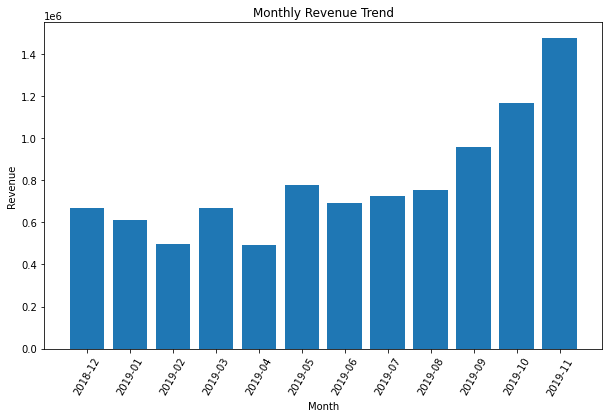

In [85]:
# Create monthly revenue plot
plt.figure(figsize=(10,6))
plt.bar(monthly_rev['invoice_month'],monthly_rev['revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=60)

plt.show()

Revenue is constantly increasing starting from June 2019. This tells us that the company is generating more sales.

#### By Date of Month

Create a table containing invoice day of month and the sales volume (total revenue).

In [86]:
# Create pivot table containing total revenue and day of month.
date_rev = df2.pivot_table(index='invoice_day', values='revenue', aggfunc='sum').reset_index()
date_rev

invoice_day     revenue
0             1  310668.450
1             2  341557.020
2             3  313978.690
3             4  326320.570
4             5  425571.090
5             6  298462.800
6             7  306901.620
7             8  380317.630
8             9  376215.710
9            10  242416.300
10           11  284687.870
11           12  417438.370
12           13  338359.981
13           14  302850.160
14           15  393949.830
15           16  345865.940
16           17  266994.040
17           18  391558.680
18           19  384930.950
19           20  281064.150
20           21  277925.030
21           22  297906.000
22           23  268449.841
23           24  198351.111
24           25  246261.110
25           26  317385.140
26           27  254927.400
27           28  257546.660
28           29  254092.190
29           30  226368.580
30           31  163232.020

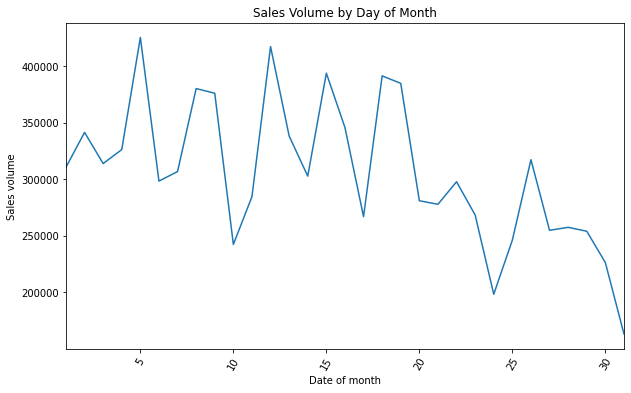

In [87]:
# Plotting number of customers per month
plt.figure(figsize=(10,6))
plt.plot(date_rev['invoice_day'],date_rev['revenue'])
plt.xlabel('Date of month')
plt.ylabel('Sales volume')
plt.title('Sales Volume by Day of Month')
plt.xlim(1,31)
plt.xticks(rotation=60)
plt.show()

Lowest sales volume is at the end of the month. Note that the total sales volume on 31st would be smaller because not every month has 31 days. The peak of sales volume is on the beginning of the month around 5th, which can be attributed to near payday where people still have more money to spend.

### Number of customers per month

Create a table containing invoice month and the number of unique customers in respective month. Note that rows with customer_id 00000 will be excluded here.

In [88]:
# Create pivot table containing number of customers per month.
monthly_cust = df2.loc[df2['customer_id']!='00000'].pivot_table(index='invoice_month', values='customer_id', aggfunc='nunique').reset_index()
monthly_cust.rename(columns={'customer_id':'Number of customers'}, inplace=True)
monthly_cust

invoice_month  Number of customers
0        2018-12                  768
1        2019-01                  804
2        2019-02                  746
3        2019-03                  948
4        2019-04                  822
5        2019-05                 1077
6        2019-06                  974
7        2019-07                  969
8        2019-08                  940
9        2019-09                 1212
10       2019-10                 1429
11       2019-11                 1671

Display the revenue trend in a timeseries line plot.

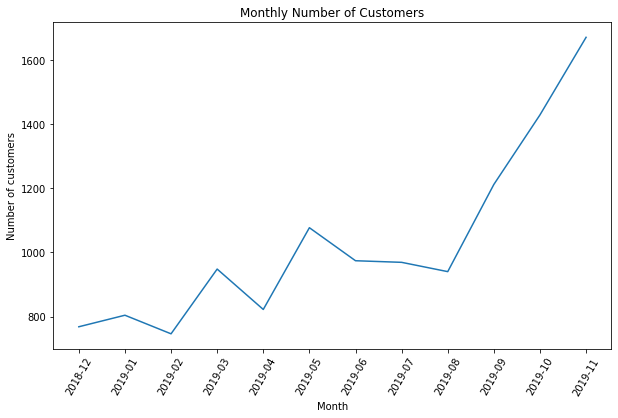

In [89]:
# Plotting number of customers per month
plt.figure(figsize=(10,6))
plt.plot(monthly_cust['invoice_month'],monthly_cust['Number of customers'])
plt.xlabel('Month')
plt.ylabel('Number of customers')
plt.title('Monthly Number of Customers')
plt.xticks(rotation=60)
plt.show()

The number of customers in the last four months of the data is rising significantly. The company has been successful in attracting more users/customers with the existing strategies that have been implemented.   

### Average purchase size and its trend

Purchase size is defined as the quantity of item purchased in one invoice. Rows with invoice number unrelated to customers' purchase, e.g., invoice number that starts with letter C will be removed.

In [90]:
# Excluding rows with invoice number that starts with C
df2_ = df2.loc[~df2['invoice_no'].str.startswith('C')]

Create table containing the sum of quantity purchased per invoice number, including the invoice month of each invoice number.

In [91]:
# Total quantity of item purchased per invoice
purchase_size = df2_.pivot_table(index=['invoice_no','invoice_month'], values='quantity', aggfunc='sum').reset_index()

# Removing discount rows
purchase_size = purchase_size.loc[~purchase_size['invoice_no'].str.startswith('C')]

purchase_size

invoice_no invoice_month  quantity
0         536847       2018-12       222
1         536848       2018-12       280
2         536849       2018-12       106
3         536851       2018-12       328
4         536852       2018-12       106
...          ...           ...       ...
18934     580371       2019-11        50
18935     580372       2019-11        91
18936     580373       2019-11       228
18937     580374       2019-11       213
18938     580375       2019-11       146

[18939 rows x 3 columns]

Calculate the average purchase size per invoice

In [92]:
# Calculating the average purchase size
sum(purchase_size['quantity'])/len(purchase_size)

270.3254659696922

Users are purchasing 270 items in one invoice on average. Let's group the average quantity purchased per invoice by month.

In [93]:
# Average purchase size monthly
monthly_size = purchase_size.pivot_table(index='invoice_month', 
                                         values='quantity', 
                                         aggfunc='mean').round(0).astype('int').reset_index()

# Rename column
monthly_size.rename(columns={'quantity':'Average quantity purchased per invoice'}, inplace=True)

monthly_size

invoice_month  Average quantity purchased per invoice
0        2018-12                                     232
1        2019-01                                     272
2        2019-02                                     257
3        2019-03                                     262
4        2019-04                                     247
5        2019-05                                     236
6        2019-06                                     247
7        2019-07                                     277
8        2019-08                                     311
9        2019-09                                     310
10       2019-10                                     303
11       2019-11                                     267

Display timeseries plot of average purchase size per month.

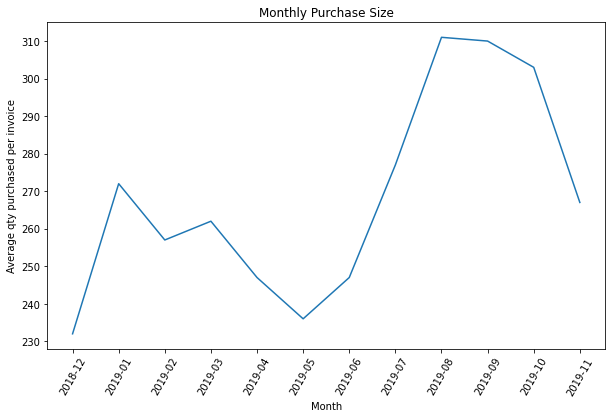

In [94]:
# Plotting average purchase size per month
plt.figure(figsize=(10,6))
plt.plot(monthly_size['invoice_month'],monthly_size['Average quantity purchased per invoice'])
plt.xlabel('Month')
plt.ylabel('Average qty purchased per invoice')
plt.title('Monthly Purchase Size')
plt.xticks(rotation=60)
plt.show()

From the trend, there was a drop once on May 2019 but the trend gets back up again. The purchase size was on its peak in August 2019 and is currently declining.

### Month-to-month trends in average revenue per user

Calculate average revenue per user (customer_id). For this calculation, rows with customer_id of '00000' will be excluded.

In [95]:
# Total revenue per user
revenue_user = df2_.pivot_table(index=['invoice_month','customer_id'], 
                                values='revenue', 
                                aggfunc='sum').reset_index()

revenue_user

invoice_month customer_id    revenue
0           2018-12     12347.0     711.79
1           2018-12     12348.0     652.80
2           2018-12     12370.0    1744.27
3           2018-12     12377.0    1001.52
4           2018-12     12383.0     555.72
...             ...         ...        ...
12363       2019-11     18259.0    1070.40
12364       2019-11     18263.0     401.76
12365       2019-11     18282.0      77.84
12366       2019-11     18283.0     637.71
12367       2019-11       00000  326631.02

[12368 rows x 3 columns]

In [96]:
# Average monthly revenue per user
monthly_rev = revenue_user.pivot_table(index='invoice_month', values='revenue', aggfunc='mean').reset_index()
monthly_rev

invoice_month     revenue
0        2018-12  871.962237
1        2019-01  760.403888
2        2019-02  670.314933
3        2019-03  706.916386
4        2019-04  602.815700
5        2019-05  723.880250
6        2019-06  710.545462
7        2019-07  746.492898
8        2019-08  800.495983
9        2019-09  789.248088
10       2019-10  815.133091
11       2019-11  883.425245

Display the trend of average revenue per user each month in a timeseries plot.

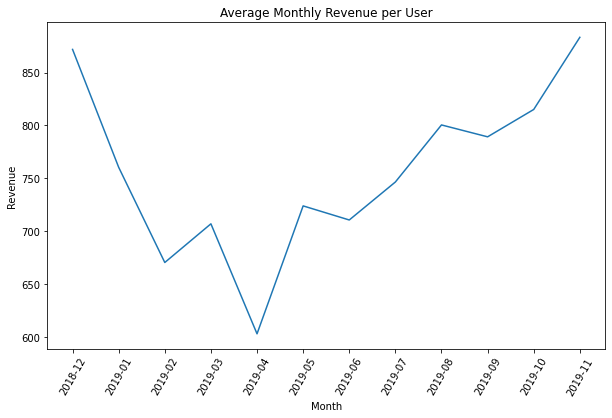

In [97]:
# Plotting monthly average revenue per user
plt.figure(figsize=(10,6))
plt.plot(monthly_rev['invoice_month'],monthly_rev['revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Average Monthly Revenue per User')
plt.xticks(rotation=60)
plt.show()

Average revenue per user is steadily increasing despite the declining purchase size (quantity of items bought). Similar to the high revenue at the earliest period (2018–12), despite the lower number of unique customers and average purchase size. Notice that this phenomenon occurred in November and December, which are near the holiday season. The increased average revenue per user is either due to customers purchasing more expensive items or ordering more often.

### Order frequency (number of invoice/month per user)

Order frequency is the number of times an average customer purchases something from the store in a specified time period or simply the average number of orders per customer. This is calculated by dividing total number of orders by the number of unique customers for the same time frame.

In [98]:
# Create order frequency table
order_freq = df2_.pivot_table(index=['invoice_month'], 
                              values=['invoice_no','customer_id'],
                              aggfunc='nunique').reset_index()

# Rename columns
order_freq.rename(columns={'invoice_no':'order_count','customer_id':'cust_count'}, inplace=True)

# Calculate order frequency by dividing the number of orders with number of unique customer at certain period
order_freq['order_freq']= order_freq['order_count']/order_freq['cust_count']

order_freq

invoice_month  cust_count  order_count  order_freq
0        2018-12         769         1284    1.669701
1        2019-01         805         1197    1.486957
2        2019-02         744         1073    1.442204
3        2019-03         949         1415    1.491043
4        2019-04         823         1177    1.430134
5        2019-05        1078         1744    1.617811
6        2019-06         974         1476    1.515400
7        2019-07         970         1497    1.543299
8        2019-08         941         1407    1.495218
9        2019-09        1213         1701    1.402308
10       2019-10        1430         2136    1.493706
11       2019-11        1672         2832    1.693780

Display the order frequency per month in a timeseries plot.

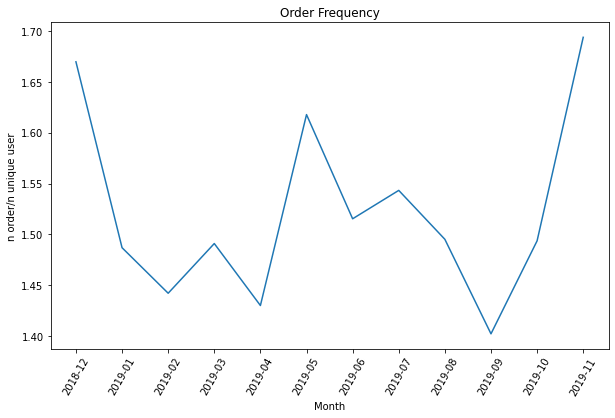

In [99]:
# Plotting order frequency per month
plt.figure(figsize=(10,6))
plt.plot(order_freq['invoice_month'],order_freq['order_freq'])
plt.xlabel('Month')
plt.ylabel('n order/n unique user')
plt.title('Order Frequency')
plt.xticks(rotation=60)
plt.show()

As mentioned previously, it turns out that order frequency increases in November and December, which explains the increase in average revenue per user. In May 2019, customers purchased more often but with lower size (less amount of item).

### Order by days of week

In [100]:
n_order = df2.pivot_table(index='invoice_dow', values='invoice_no', aggfunc='nunique').reset_index()

n_order

invoice_dow  invoice_no
0            0        2137
1            1        2963
2            2        3408
3            3        3450
4            4        3969
5            5        3076

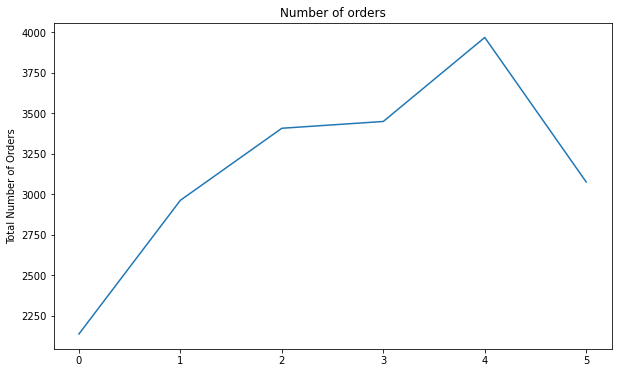

In [101]:
# Displaying time series for average number of orders in each cluster
plt.figure(figsize=(10,6))
plt.plot(n_order['invoice_dow'], n_order['invoice_no'])
plt.title('Number of orders')
plt.ylabel('Total Number of Orders')
plt.show()

The fewest orders were created on Monday (0), while the most orders were created on Saturday (4).

From exploratory data analysis, some insights from the dataset are obtained as follows:
* Revenue has been increasing steadily since June 2019.
* The number of unique customers has significantly increased since August 2019.
* Customers purchased the highest number of items in August 2019.
* Higher order frequency increases in November and December, resulting in an increase in average revenue per user.
* In May 2019, customers purchased more often but with a smaller purchase size.
* Customers create the most orders on Saturday and the least on Monday.

## Machine Learning

In this part, KMeans, a machine learning algorithm will be used to form segments or clusters among the customers. 

### Prepare user dataset

First, we need to prepare a table with each row unique to one user. This table should contain information for each user obtained from extracting figures related to user's purchase activity from the cleaned original dataset.

In [102]:
# Create a table unique for users
users = df2.pivot_table(index='customer_id', 
                        values=['invoice_no','stock_code','revenue','quantity_ret','quantity','actual_qty','return_count'], 
                        aggfunc={'invoice_no':'count', #n order or order frequency
                                 'stock_code':'nunique', # number of unique item purchased
                                 'revenue':['sum','mean'], #revenue (total & average)
                                 'quantity_ret':'sum', #total returned item quantity
                                 'return_count':'sum', #total number of times returning product
                                 'quantity':['sum','mean'], # purchase size (total & average)                    
                                 }).reset_index()

# Rename column
users.columns=('customer_id',
               'n_order',
               'avg_purchase_size',
               'total_purchase_size',
               'total_qty_return',
               'n_return',
               'avg_revenue',
               'total_revenue',
              'n_kind_of_item')

# Get positive return quantity
users['total_qty_return'] = users['total_qty_return'].abs()

# Remove rows with unknown customer_id
users= users.loc[users['customer_id']!='00000']

users

customer_id  n_order  avg_purchase_size  total_purchase_size  \
0        12347.0      171          13.251462               2266.0   
1        12348.0       27          86.370370               2332.0   
2        12349.0       72           8.750000                630.0   
3        12350.0       16          12.250000                196.0   
4        12352.0       73           6.383562                466.0   
...          ...      ...                ...                  ...   
4256     18280.0       10           4.500000                 45.0   
4257     18281.0        7           7.714286                 54.0   
4258     18282.0       12           8.583333                103.0   
4259     18283.0      671           1.810730               1215.0   
4260     18287.0       70          22.657143               1586.0   

      total_qty_return  n_return  avg_revenue  total_revenue  n_kind_of_item  
0                  0.0       0.0    23.889942        4085.18             100  
1                  0.0       0.0    53.231111        1437.24              21  
2                  0.0       0.0    20.243750        1457.55              72  
3                  0.0       0.0    18.400000         294.40              16  
4                  0.0       0.0    28.845342        2105.71              58  
...                ...       ...          ...            ...             ...  
4256               0.0       0.0    18.060000         180.60              10  
4257               0.0       0.0    11.545714          80.82               7  
4258               5.0       1.0    14.837500         178.05              12  
4259               0.0       0.0     2.738495        1837.53             259  
4260               0.0       0.0    26.246857        1837.28              59  

[4261 rows x 9 columns]

Create a table with customer_id, recent_order_date, earliest_order_date, and timespan for each user.

In [103]:
# Get a table containing customer_id and the time information
date = df2[['customer_id','recent_order_date','earliest_order_date','timespan']].drop_duplicates().reset_index(drop=True)
date

customer_id   recent_order_date earliest_order_date  timespan
0        17135.0 2019-11-21 16:48:00 2018-12-01 09:31:00       355
1        13408.0 2019-11-29 14:55:00 2018-12-01 09:39:00       363
2        17396.0 2019-10-29 14:12:00 2018-12-01 09:45:00       332
3        12967.0 2018-12-14 19:10:00 2018-12-01 09:49:00        13
4        12686.0 2018-12-01 09:51:00 2018-12-01 09:51:00         0
...          ...                 ...                 ...       ...
4257     14594.0 2019-11-30 13:28:00 2019-11-30 13:28:00         0
4258     15539.0 2019-11-30 13:36:00 2019-11-30 13:36:00         0
4259     13017.0 2019-11-30 15:53:00 2019-11-30 15:53:00         0
4260     14865.0 2019-11-30 16:25:00 2019-11-30 16:25:00         0
4261     18174.0 2019-11-30 16:56:00 2019-11-30 16:56:00         0

[4262 rows x 4 columns]

Add the time information to the users table by performing left merging.

In [104]:
# Merging
users = users.merge(date, on='customer_id', how='left')
users

customer_id  n_order  avg_purchase_size  total_purchase_size  \
0        12347.0      171          13.251462               2266.0   
1        12348.0       27          86.370370               2332.0   
2        12349.0       72           8.750000                630.0   
3        12350.0       16          12.250000                196.0   
4        12352.0       73           6.383562                466.0   
...          ...      ...                ...                  ...   
4256     18280.0       10           4.500000                 45.0   
4257     18281.0        7           7.714286                 54.0   
4258     18282.0       12           8.583333                103.0   
4259     18283.0      671           1.810730               1215.0   
4260     18287.0       70          22.657143               1586.0   

      total_qty_return  n_return  avg_revenue  total_revenue  n_kind_of_item  \
0                  0.0       0.0    23.889942        4085.18             100   
1                  0.0       0.0    53.231111        1437.24              21   
2                  0.0       0.0    20.243750        1457.55              72   
3                  0.0       0.0    18.400000         294.40              16   
4                  0.0       0.0    28.845342        2105.71              58   
...                ...       ...          ...            ...             ...   
4256               0.0       0.0    18.060000         180.60              10   
4257               0.0       0.0    11.545714          80.82               7   
4258               5.0       1.0    14.837500         178.05              12   
4259               0.0       0.0     2.738495        1837.53             259   
4260               0.0       0.0    26.246857        1837.28              59   

       recent_order_date earliest_order_date  timespan  
0    2019-10-29 12:25:00 2018-12-05 14:57:00       328  
1    2019-09-23 13:13:00 2018-12-14 19:09:00       283  
2    2019-11-19 09:51:00 2019-11-19 09:51:00         0  
3    2019-01-31 16:01:00 2019-01-31 16:01:00         0  
4    2019-11-01 14:37:00 2019-02-14 12:33:00       260  
...                  ...                 ...       ...  
4256 2019-03-05 09:52:00 2019-03-05 09:52:00         0  
4257 2019-06-10 10:53:00 2019-06-10 10:53:00         0  
4258 2019-11-30 11:43:00 2019-08-03 13:35:00       119  
4259 2019-11-28 12:59:00 2019-01-04 14:14:00       328  
4260 2019-10-26 09:29:00 2019-05-20 10:39:00       159  

[4261 rows x 12 columns]

The table is ready to be used for KMeans clustering.

### KMeans Clustering

K Means clustering is a machine learning algorithm used for grouping data points into distinct clusters based on their similarities.

In [105]:
# Search The Best Cluster
X = users[['n_order',
           'avg_purchase_size',
           'total_purchase_size',
           'total_qty_return',
           'n_return',
           'avg_revenue',
           'total_revenue',
           'n_kind_of_item',
           'timespan']]
cluster = []
wcss = []
for i in range(10):
    km = KMeans(n_clusters=i+1)
    km.fit(X)
    error = km.inertia_
    wcss.append(error)
    cluster.append(i+1)

Create elbow plot with number of clusters in x-axis and WCSS in y-axis. WCSS is the Euclidean distance or sum of the squared distance between each point and the centroid in a cluster to which it is assigned.

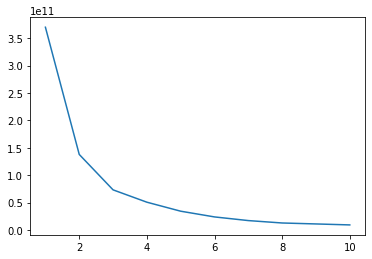

In [106]:
# From this algorithm, the best number of cluster or category is 3
plt.plot(cluster, wcss)
plt.show()

In [107]:
# Retraining with 3 cluster
km = KMeans(n_clusters=3)
km.fit(X)
clusters = km.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Add cluster

Add cluster as a new column in users and df2 dataset.

In [108]:
# Adding cluster as a column in users dataset
users['cluster'] = clusters

users

customer_id  n_order  avg_purchase_size  total_purchase_size  \
0        12347.0      171          13.251462               2266.0   
1        12348.0       27          86.370370               2332.0   
2        12349.0       72           8.750000                630.0   
3        12350.0       16          12.250000                196.0   
4        12352.0       73           6.383562                466.0   
...          ...      ...                ...                  ...   
4256     18280.0       10           4.500000                 45.0   
4257     18281.0        7           7.714286                 54.0   
4258     18282.0       12           8.583333                103.0   
4259     18283.0      671           1.810730               1215.0   
4260     18287.0       70          22.657143               1586.0   

      total_qty_return  n_return  avg_revenue  total_revenue  n_kind_of_item  \
0                  0.0       0.0    23.889942        4085.18             100   
1                  0.0       0.0    53.231111        1437.24              21   
2                  0.0       0.0    20.243750        1457.55              72   
3                  0.0       0.0    18.400000         294.40              16   
4                  0.0       0.0    28.845342        2105.71              58   
...                ...       ...          ...            ...             ...   
4256               0.0       0.0    18.060000         180.60              10   
4257               0.0       0.0    11.545714          80.82               7   
4258               5.0       1.0    14.837500         178.05              12   
4259               0.0       0.0     2.738495        1837.53             259   
4260               0.0       0.0    26.246857        1837.28              59   

       recent_order_date earliest_order_date  timespan  cluster  
0    2019-10-29 12:25:00 2018-12-05 14:57:00       328        0  
1    2019-09-23 13:13:00 2018-12-14 19:09:00       283        0  
2    2019-11-19 09:51:00 2019-11-19 09:51:00         0        0  
3    2019-01-31 16:01:00 2019-01-31 16:01:00         0        0  
4    2019-11-01 14:37:00 2019-02-14 12:33:00       260        0  
...                  ...                 ...       ...      ...  
4256 2019-03-05 09:52:00 2019-03-05 09:52:00         0        0  
4257 2019-06-10 10:53:00 2019-06-10 10:53:00         0        0  
4258 2019-11-30 11:43:00 2019-08-03 13:35:00       119        0  
4259 2019-11-28 12:59:00 2019-01-04 14:14:00       328        0  
4260 2019-10-26 09:29:00 2019-05-20 10:39:00       159        0  

[4261 rows x 13 columns]

In [109]:
list(df.columns)

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id']

In [110]:
# Adding cluster into df2 dataset
df2 = df2.merge(users[['customer_id','cluster']], on='customer_id', how='left')
df2_ = df2_.merge(users[['customer_id','cluster']], on='customer_id', how='left')

In [111]:
# Displaying the changes
df2.head()

index invoice_no stock_code                         description  quantity  \
0   5217     536847      22155              STAR DECORATION RUSTIC        48   
1   5218     536847      21807     WHITE CHRISTMAS STAR DECORATION        36   
2   5219     536847      22161     HEART DECORATION RUSTIC HANGING        24   
3   5220     536847      22065       CHRISTMAS PUDDING TRINKET POT        24   
4   5221     536847      20956  PORCELAIN T-LIGHT HOLDERS ASSORTED        12   

         invoice_date  unit_price customer_id  quantity_ret  actual_qty  \
0 2018-12-01 09:31:00        0.42     17135.0           0.0         0.0   
1 2018-12-01 09:31:00        0.42     17135.0           0.0         0.0   
2 2018-12-01 09:31:00        0.65     17135.0           0.0         0.0   
3 2018-12-01 09:31:00        1.45     17135.0           0.0         0.0   
4 2018-12-01 09:31:00        1.25     17135.0           0.0         0.0   

   return_count  revenue  invoice_day  invoice_dow invoice_month  \
0           0.0    20.16            1            5       2018-12   
1           0.0    15.12            1            5       2018-12   
2           0.0    15.60            1            5       2018-12   
3           0.0    34.80            1            5       2018-12   
4           0.0    15.00            1            5       2018-12   

    recent_order_date earliest_order_date  timespan  cluster  
0 2019-11-21 16:48:00 2018-12-01 09:31:00       355      0.0  
1 2019-11-21 16:48:00 2018-12-01 09:31:00       355      0.0  
2 2019-11-21 16:48:00 2018-12-01 09:31:00       355      0.0  
3 2019-11-21 16:48:00 2018-12-01 09:31:00       355      0.0  
4 2019-11-21 16:48:00 2018-12-01 09:31:00       355      0.0

Calculate the number of unique customers in each cluster.

In [112]:
# Calculate number of users in each clusters
n_users_cluster = users.pivot_table(index='cluster', values = 'customer_id', aggfunc='nunique').reset_index()
n_users_cluster.rename(columns={'customer_id':'n_cust'}, inplace=True)
n_users_cluster

cluster  n_cust
0        0    4224
1        1       6
2        2      31

Majority of the customers fall in cluster 0.

### Segments that tend to make seasonal purchases

Create a table containing number of orders in each cluster for each invoice date.

In [113]:
# Create table containing number of unique orders for each cluster in each invoice date.
n_order = df2_.pivot_table(index='invoice_day', columns='cluster', values='invoice_no', aggfunc='nunique').reset_index()

n_order

cluster  invoice_day  0.0  1.0  2.0
0                  1  452   17   46
1                  2  497   15   48
2                  3  533   11   58
3                  4  610   12   58
4                  5  595   20   50
5                  6  612    7   37
6                  7  577   10   30
7                  8  553   14   52
8                  9  547   18   56
9                 10  466   12   25
10                11  541    6   45
11                12  599   17   51
12                13  498   25   25
13                14  579   10   56
14                15  618   24   47
15                16  512   12   42
16                17  470   17   27
17                18  600   27   29
18                19  530   22   40
19                20  510   17   33
20                21  502   13   57
21                22  531   10   37
22                23  513    6   40
23                24  387   13   41
24                25  489   12   42
25                26  547   23   49
26                27  424    7   27
27                28  442   11   27
28                29  438   11   36
29                30  447   10   40
30                31  251    6   29

Display time series for number of unique orders in each cluster.

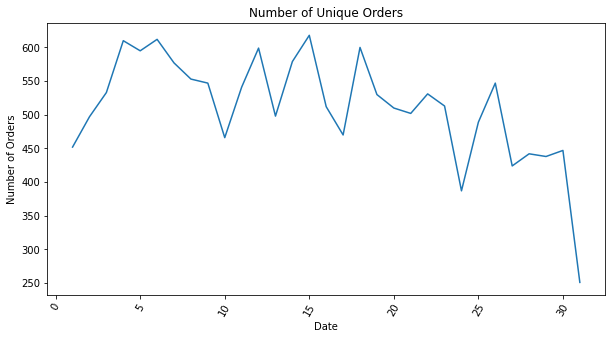

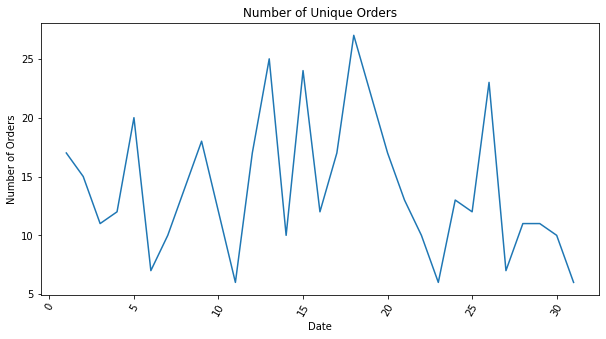

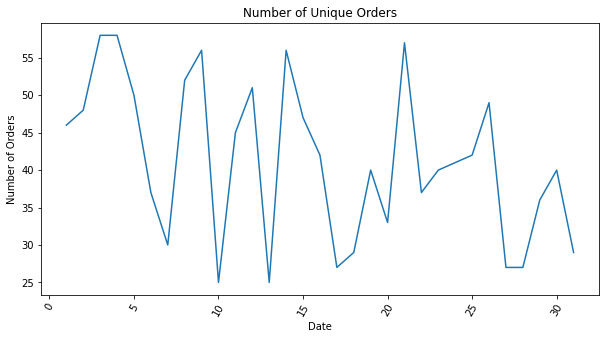

In [114]:
# Displaying time series for number of orders in each cluster
clusters=[0.0,1.0,2.0]
for n in clusters:
    plt.figure(figsize=(10,5))
    plt.plot(n_order['invoice_day'], n_order[n])
    plt.title('Number of Unique Orders')
    plt.xlabel('Date')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=60)
    plt.show()

The number of unique orders went up and down, but there was no specific pattern of seasonality found in all clusters.

In [115]:
# Create table containing number of orders by day in each cluster
n_order_dow = df2.pivot_table(index='invoice_dow', columns='cluster', values='invoice_no', aggfunc='nunique').reset_index()

n_order_dow

cluster  invoice_dow   0.0  1.0  2.0
0                  0  2004   18   84
1                  1  2434   80  203
2                  2  2730   90  232
3                  3  2868   76  281
4                  4  3414  106  253
5                  5  2462   68  246

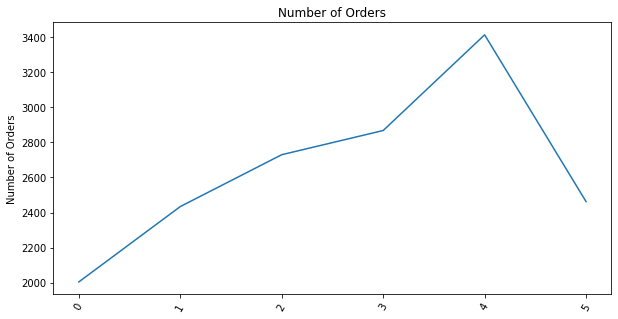

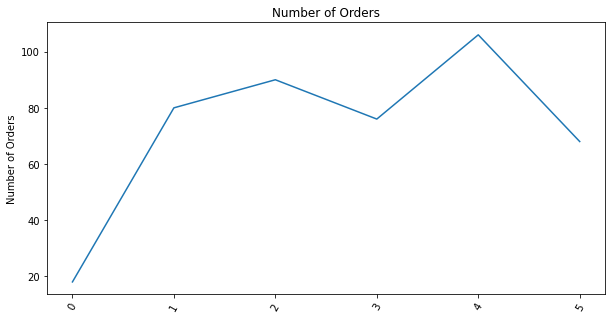

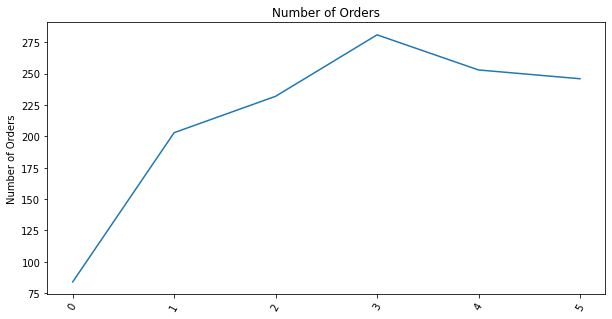

In [116]:
# Displaying time series for average number of orders in each cluster
clusters=[0.0,1.0,2.0]
for n in clusters:
    plt.figure(figsize=(10,5))
    plt.plot(n_order_dow['invoice_dow'], n_order_dow[n])
    plt.title('Number of Orders')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=60)
    plt.show()

All clusters had the least number of orders on Monday (0). Cluster 0 and cluster 1 have the peak orders on Saturday (4). Cluster 2 is quite different from the rest, with peak orders on Friday.

### Repeat Customer

Repeat customer is defined as customer who has purchased twice or more from the store.

In [117]:
# Get table with repeat customers data
repeat_cust = users.loc[users['n_order']>1]

In [118]:
# Calculate percentage of repeat customers
len(repeat_cust)/len(users)*100

98.380661816475

The repeat customer percentage is very high at 98.4%, meaning that most of the customers always came back to make orders. 

In [119]:
# Create table with number of repeat customers for each cluster
repeat_pivot = repeat_cust.pivot_table(index='cluster', values='customer_id', aggfunc='count').reset_index()
repeat_pivot.rename(columns={'customer_id':'repeat_cust'})

cluster  repeat_cust
0        0         4155
1        1            6
2        2           31

In [120]:
# Add number of customers in each cluster
repeat_pivot = repeat_pivot.merge(n_users_cluster, on='cluster', how='left')
repeat_pivot.rename(columns={'customer_id':'n_repeat_cust'}, inplace=True)
repeat_pivot

cluster  n_repeat_cust  n_cust
0        0           4155    4224
1        1              6       6
2        2             31      31

In [121]:
# Calculate the percentage of repeat customers in each cluster
repeat_pivot['percent_repeat'] = (repeat_pivot['n_repeat_cust']/repeat_pivot['n_cust']*100).round(2)

repeat_pivot

cluster  n_repeat_cust  n_cust  percent_repeat
0        0           4155    4224           98.37
1        1              6       6          100.00
2        2             31      31          100.00

The repeat customer percentages in each cluster are very high. Majority of the customers are making at least two purchases.

### Segments that tend to make several orders over a long period of time

Create scatterplot of number of orders vs. duration to see each segment's purchase behavior. 

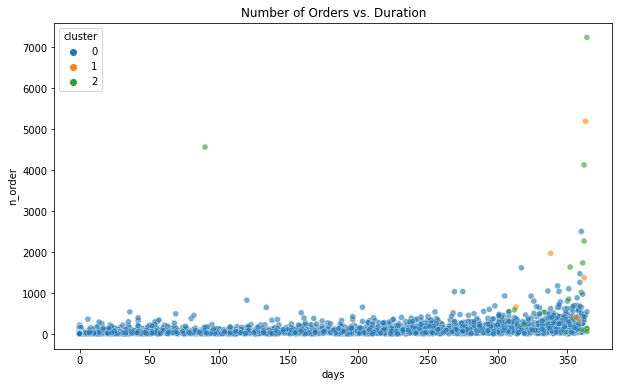

In [122]:
# Create scatterplot of number of orders vs. duration/timespan in days 
plt.figure(figsize=(10,6))

sns.scatterplot(x=users['timespan'], 
                y=users['n_order'], 
                hue=users['cluster'], 
                palette="tab10", 
                legend='full',
                alpha= 0.6)
plt.title('Number of Orders vs. Duration')
plt.xlabel('days')
plt.show()

Segments that tend to make several orders over a long period of time will typically be located in the lower right corner of the graph. There is no particular segment with this strong tendency. However, older users tend to make more orders.   

### Segments that make many purchases over a short period of time

Create scatterplot of purchase size vs. duration to see each segment's purchase behavior. 

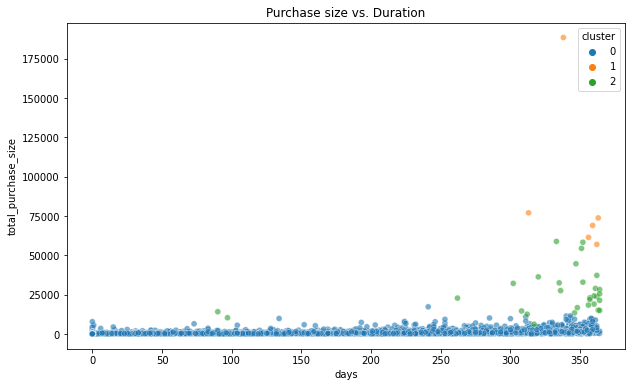

In [123]:
# Create scatterplot of total purchase size vs. duration/timespan in days
plt.figure(figsize=(10,6))

sns.scatterplot(x=users['timespan'], 
                y=users['total_purchase_size'], 
                hue=users['cluster'], 
                palette="tab10", 
                legend='full', 
                alpha= 0.6)
plt.title('Purchase size vs. Duration')
plt.xlabel('days')
plt.show()

Segments that tend to make many purchases over a short period of time will typically be located in the upper right corner of the graph. There is no particular segment with this strong tendency. Older customers are more loyal as seen from the higher purchase size in older users (>350 days).

### Segments that make big orders

In [124]:
# Calculate the mean of values in numerical columns of users table
clusters_mean = users.groupby('cluster').mean().round()

clusters_mean 

n_order  avg_purchase_size  total_purchase_size  total_qty_return  \
cluster                                                                      
0           79.0               20.0                807.0               3.0   
1         1658.0              104.0              87819.0              60.0   
2          923.0              182.0              25508.0             279.0   

         n_return  avg_revenue  total_revenue  n_kind_of_item  timespan  
cluster                                                                  
0             1.0         31.0         1362.0            58.0     123.0  
1            17.0        267.0       178318.0           633.0     348.0  
2            12.0        950.0        39955.0           293.0     316.0

Cluster 1 made the most orders, but Cluster 2 had the largest order size. Cluster 0 are mostly new users, as seen from the shorter timespan and the least number of unique items purchased.  

### Segments that tend to purchase more different types of item

Display density plot for number of unique item purchased in each cluster.

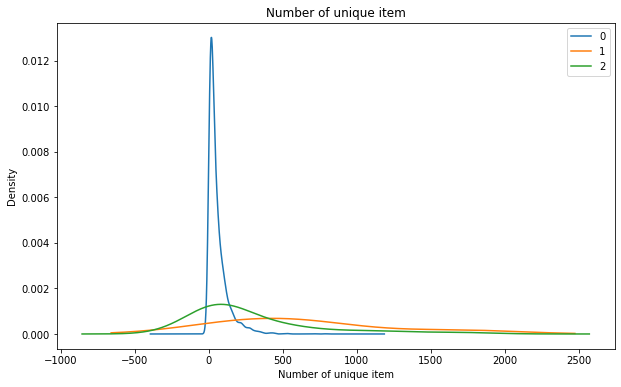

In [125]:
# Displaying density plot for number of unique item purchased in each cluster
plt.figure(figsize=(10,6))
users.groupby('cluster')['n_kind_of_item'].plot.density()
plt.title('Number of unique item')
plt.xlabel('Number of unique item')
plt.legend()
plt.show()

Cluster 1 tends to purchase a wider variety of items. Cluster 0 has a narrower variety of items, which is normal since the users are mostly newer.

## Statistical Testing

We will use paired t-test (st.ttest_ind()) to determine if there is a significant difference between the means of two groups. 

### Formulate and test a hypothesis on differences in average order size for different user segments. 

Define the null hypothesis and alternative hypothesis as follows:
* H0: There is no difference in average order size for the first group and second group
* H1: There is difference in average order size for the first group and second group

Alpha value is set at 0.05.

In [126]:
# Menetapkan nilai alpha
alpha = 0.05

Separate users dataset by clusters.

In [127]:
# Separate average purchase size by cluster
size_0 = users.loc[users['cluster']==0]['avg_purchase_size']
size_1 = users.loc[users['cluster']==1]['avg_purchase_size']
size_2 = users.loc[users['cluster']==2]['avg_purchase_size']

In [128]:
# Conduct the t-test
results = st.ttest_ind(size_0, size_1, equal_var=True)

# Calculate and display p-value
print('p_value :', results.pvalue)

# Displaying the result
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 0.03322522712271141
H0 ditolak


In [129]:
# Conduct the t-test
results = st.ttest_ind(size_0, size_2, equal_var=True)

# Calculate and display p-value
print('p_value :', results.pvalue)

# Displaying the result
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 5.709769253443829e-19
H0 ditolak


In [130]:
# Conduct the t-test
results = st.ttest_ind(size_1, size_2, equal_var=True)

# Calculate and display p-value
print('p_value :', results.pvalue)

# Displaying the result
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 0.5678082946838938
H0 tidak dapat ditolak


Cluster 0 has different average order size from cluster 1 and cluster 2, while cluster 1 and cluster 2 have similar average order size.

### Formulate and test a hypothesis on differences in average order frequency for different user segments. 

Define the null hypothesis and alternative hypothesis as follows:
* H0: There is no difference in average order frequency for the first group and second group 
* H1: There is difference in average order frequency for the first group and second group

Create a table containing number of unique invoice number (orders) and unique customer.

In [131]:
# Create pivot table with number of unique customer_id and invoice_no in each month
freq_cluster = df2.pivot_table(index='invoice_month', 
                                 columns='cluster',
                                 values=['invoice_no','customer_id'],
                                aggfunc='nunique').reset_index()

freq_cluster

invoice_month customer_id         invoice_no         
cluster                       0.0 1.0 2.0        0.0 1.0  2.0
0             2018-12         740   5  23       1021  19  103
1             2019-01         775   5  24        986  17   86
2             2019-02         716   6  24        888  17   75
3             2019-03         915   6  27       1153  31  105
4             2019-04         792   5  25        987  16   87
5             2019-05        1043   6  28       1430  39  141
6             2019-06         943   6  25       1213  39  104
7             2019-07         939   6  24       1233  31   98
8             2019-08         907   6  27       1184  37  117
9             2019-09        1184   5  23       1483  61   91
10            2019-10        1396   6  27       1845  63  125
11            2019-11        1637   6  28       2489  68  167

Calculate order frequency for each cluster by dividing the number of unique invoice_no and number of unique customer_id.

In [132]:
# Calculate order frequency for each cluster
new_cols = [('order_freq', col) for col in freq_cluster['invoice_no'].columns]
freq_cluster[new_cols]= freq_cluster['invoice_no'].div(freq_cluster['customer_id'])

freq_cluster

invoice_month customer_id         invoice_no          order_freq  \
cluster                       0.0 1.0 2.0        0.0 1.0  2.0        0.0   
0             2018-12         740   5  23       1021  19  103   1.379730   
1             2019-01         775   5  24        986  17   86   1.272258   
2             2019-02         716   6  24        888  17   75   1.240223   
3             2019-03         915   6  27       1153  31  105   1.260109   
4             2019-04         792   5  25        987  16   87   1.246212   
5             2019-05        1043   6  28       1430  39  141   1.371045   
6             2019-06         943   6  25       1213  39  104   1.286320   
7             2019-07         939   6  24       1233  31   98   1.313099   
8             2019-08         907   6  27       1184  37  117   1.305402   
9             2019-09        1184   5  23       1483  61   91   1.252534   
10            2019-10        1396   6  27       1845  63  125   1.321633   
11            2019-11        1637   6  28       2489  68  167   1.520464   

                              
cluster        1.0       2.0  
0         3.800000  4.478261  
1         3.400000  3.583333  
2         2.833333  3.125000  
3         5.166667  3.888889  
4         3.200000  3.480000  
5         6.500000  5.035714  
6         6.500000  4.160000  
7         5.166667  4.083333  
8         6.166667  4.333333  
9        12.200000  3.956522  
10       10.500000  4.629630  
11       11.333333  5.964286

Separate the order frequency for each cluster in separate variable.

In [133]:
# Separate order frequency by cluster
freq_0 = freq_cluster['order_freq'][0.0]
freq_1 = freq_cluster['order_freq'][1.0]
freq_2 = freq_cluster['order_freq'][2.0]

In [134]:
# Conduct the t-test
results = st.ttest_ind(freq_0, freq_1, equal_var=True)

# Calculate and display p-value
print('p_value :', results.pvalue)

# Displaying the result
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 1.9817499732983934e-05
H0 ditolak


In [135]:
# Conduct the t-test
results = st.ttest_ind(freq_0, freq_2, equal_var=True)

# Calculate and display p-value
print('p_value :', results.pvalue)

# Displaying the result
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 5.795827094280802e-12
H0 ditolak


In [136]:
# Conduct the t-test
results = st.ttest_ind(freq_1, freq_2, equal_var=True)

# Calculate and display p-value
print('p_value :', results.pvalue)

# Displaying the result
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 0.03483304952151431
H0 ditolak


All clusters have different order frequency from each other.

### Formulate a statistical hypothesis regarding the data from the dataset and test it. 

 Is there any difference in the average revenue in segment that has newer users with the rest of the users? 
 * Define the null hypothesis and alternative hypothesis as follows:
     * H0: There is no difference in the average revenue for users in segment with newer users and the rest of the users. 
     * H1: There is difference in the average revenue for users in segment with newer users and the rest of the users.

Cluster 0 has more newer users. The rest of the users will be users from cluster 1 and cluster 2.

In [137]:
# Preparing the data for testing
cluster_1 = users.loc[users['cluster']==0,'avg_revenue']
cluster_rest = users.loc[users['cluster']!=0,'avg_revenue']

In [138]:
# Conduct the t-test
results = st.ttest_ind(cluster_1, cluster_rest, equal_var=True)

# Calculate and display p-value
print('p_value :', results.pvalue)

# Displaying the result
if results.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 tidak dapat ditolak')

p_value : 1.8703342055154056e-53
H0 ditolak


There is statistically significant difference in the average revenue of users in cluster 0 and the rest of the users.

## Conclusions

From the analysis, the following can be concluded:
* Revenue has been increasing steadily since June 2019. This is predominantly due to increased number of unique customers since August 2019. 
* The highest purchase size was in August 2019.
* Higher order frequency increases in November and December, resulting in an increase in average revenue per user.
* In May 2019, customers purchased more often but with smaller purchase size.
* Customers create the most orders on Saturday and the least number of orders on Monday. This is probably due to more free time on the weekend to scroll through e-commerce site and place orders.
* By KMeans, three segments of users were obtained from the data. Each cluster has the following characteristics:
    * Cluster 0: comprised of newer users as seen from shortest timespan and least kind of item purchased. 
    * Cluster 1: older users, purchases wider variety of items, likes to place many orders.
    * Cluster 2: user age is almost similar to cluster 1, has the biggest order size and also highest average revenue.
* No specific pattern of seasonality were found in all clusters.
* The repeat customer percentage is very high at 98.4%, meaning that most of the customers always came back to make orders. 
* Older customers are more loyal as seen from the higher purchase size and number of orders made (>350 days).
* Cluster 0 has different average order size from cluster 1 and cluster 2, while cluster 1 and cluster 2 have similar average order size.
* All clusters have different order frequency from each other.
* There is statistically significant difference in the average revenue of users in cluster 0 and the rest of the users.

Recommendations:
* Develop a reward or loyalty program to maintain loyal customers and to encourage newer customers to purchase more.
* Show interesting personalized offers through push notifications especially on Monday. 
* Remind customers to checkout items from the cart by notifying the stock or availability of item they liked or added to cart.